# 1-Veri keşfi
# 2- Veri temizliği
# 3- Uç değerler incelemesi
# 4- Veri Keşfi
# 5- Özellik mühendisliği
# 5- Regresyon


### Hedef değişken: Life expectancy
### Açıklayıcı değişkenler:  status, percentage_expenditure, alcohol, schooling, gdp, hepatitis_b, bmı

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="darkgrid")
sns.axes_style("darkgrid")
import plotly.express as px
from scipy.stats.mstats import winsorize
from scipy.stats import stats
from scipy.stats import zscore
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid")

title_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 15}
label_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}


## 1- Veri keşfi

In [270]:
df_life= pd.read_csv("Desktop/Bootcamp Ödevler/Life_Expectancy_Data.csv")


yeni dataframe'den veri alma

In [3]:
df_all= pd.read_csv("Desktop/Bootcamp Ödevler/all.csv")
df_all["Country"]= df_all["name"] 
del df_all["name"]
df_all.head()

,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Country
0,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,Afghanistan
1,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN,Åland Islands
2,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,Albania
3,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN,Algeria
4,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN,American Samoa


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
alpha-2                     248 non-null object
alpha-3                     249 non-null object
country-code                249 non-null int64
iso_3166-2                  249 non-null object
region                      248 non-null object
sub-region                  248 non-null object
intermediate-region         107 non-null object
region-code                 248 non-null float64
sub-region-code             248 non-null float64
intermediate-region-code    107 non-null float64
Country                     249 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [5]:
merged= pd.DataFrame()
merged= pd.merge(df_life, df_all, on="Country",  how= "left")
merged.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


In [6]:
usefull_col= ["alpha-3", "sub-region"]
for i in merged.columns:
    if i not in df_life.columns | usefull_col:
        del merged[i]
merged.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,alpha-3,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,AFG,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,AFG,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,AFG,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,AFG,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,AFG,Southern Asia


In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 24 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [8]:
df= merged.copy()
df.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life expectancy,65,59.9,59.9,59.5,59.2
Adult Mortality,263,271,268,272,275
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentage expenditure,71.2796,73.5236,73.2192,78.1842,7.09711
Hepatitis B,65,62,64,67,68
Measles,1154,492,430,2787,3013


#### kolonların sıralarını düzenleme:

In [9]:
cols= df.columns.tolist()
cols = cols[-2:]+ cols[:-2]
df= df[cols]
df.head()

,alpha-3,sub-region,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,AFG,Southern Asia,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,AFG,Southern Asia,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,AFG,Southern Asia,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,AFG,Southern Asia,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,AFG,Southern Asia,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
df.info()  # object leri category yapıyorum.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 24 columns):
alpha-3                            2826 non-null object
sub-region                         2826 non-null object
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null f

In [11]:
df.columns

Index(['alpha-3', 'sub-region', 'Country', 'Year', 'Status',
       'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
df.columns= ['alpha_3', 'sub_region', 'country', 'year', 'status',
       'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmı',
       'under-five deaths ', 'Polio', 'total_expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'gdp', 'population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'schooling']

In [13]:
df["country"]= df["country"].astype("category")
df["status"]= df["status"].astype("category")
df["alpha_3"]= df["alpha_3"].astype("category")
df["sub_region"]= df["sub_region"].astype("category")

In [14]:
df.nunique()

alpha_3                             186
sub_region                           17
country                             193
year                                 16
status                                2
life_expectancy                     362
adult_mortality                     425
infant_deaths                       209
alcohol                            1076
percentage_expenditure             2328
hepatitis_b                          87
measles                             958
bmı                                 608
under-five deaths                   252
Polio                                73
total_expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
gdp                                2490
population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
schooling                           173
dtype: int64

In [15]:
df.info() # boyut 573'ten 536 kb a düştü.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 24 columns):
alpha_3                            2826 non-null category
sub_region                         2826 non-null category
country                            2938 non-null category
year                               2938 non-null int64
status                             2938 non-null category
life_expectancy                    2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles                            2938 non-null int64
bmı                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
total_expenditure                  2712 no

In [16]:
df.head()

,alpha_3,sub_region,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,...,Polio,total_expenditure,Diphtheria,HIV/AIDS,gdp,population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling
0,AFG,Southern Asia,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,AFG,Southern Asia,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,AFG,Southern Asia,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,AFG,Southern Asia,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,AFG,Southern Asia,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 2- Veri temizliği

In [17]:
df.isnull().sum()*100/df.shape[0]

alpha_3                             3.812117
sub_region                          3.812117
country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmı                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
total_expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
gdp                                15.248468
population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income com

#### Alcohol, hepatitis_b, bmı, gdp, schooling kolonlarının boş değerlerini coğrafi  bölgelerin içinde enterpolasyon uygulayacağım.
#### sub_region ve alpha_3 değerleri olmayanları atacağım.
#### life_expectancy, status  boş değer içermiyor.

In [18]:
df.dropna(subset=["alpha_3", "sub_region"], inplace=True)

In [19]:
df.isnull().sum()*100/df.shape[0]

alpha_3                             0.000000
sub_region                          0.000000
country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.353857
adult_mortality                     0.353857
infant_deaths                       0.000000
alcohol                             6.617127
percentage_expenditure              0.000000
hepatitis_b                        18.966737
measles                             0.000000
bmı                                 1.203114
under-five deaths                   0.000000
Polio                               0.672328
total_expenditure                   7.218684
Diphtheria                          0.672328
 HIV/AIDS                           0.000000
gdp                                12.455768
population                         19.674452
 thinness  1-19 years               1.203114
 thinness 5-9 years                 1.203114
Income com

In [20]:
df[(df["schooling"]==0)]

,alpha_3,sub_region,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,...,Polio,total_expenditure,Diphtheria,HIV/AIDS,gdp,population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling
74,ATG,Latin America and the Caribbean,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,...,98.0,4.41,99.0,0.1,11371.938950,NaN,3.5,3.4,0.0,0.0
75,ATG,Latin America and the Caribbean,Antigua and Barbuda,2004,Developing,74.4,149.0,0,7.28,22.862952,...,97.0,4.21,97.0,0.1,1352.837400,NaN,3.5,3.4,0.0,0.0
76,ATG,Latin America and the Caribbean,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.16,1158.065259,...,99.0,4.53,99.0,0.1,9739.825560,NaN,3.5,3.5,0.0,0.0
77,ATG,Latin America and the Caribbean,Antigua and Barbuda,2002,Developing,74.0,153.0,0,7.21,927.407586,...,93.0,4.41,98.0,0.1,9386.716452,NaN,3.6,3.5,0.0,0.0
78,ATG,Latin America and the Caribbean,Antigua and Barbuda,2001,Developing,73.8,154.0,0,7.51,163.767698,...,99.0,4.48,97.0,0.1,9358.154162,NaN,3.6,3.5,0.0,0.0
79,ATG,Latin America and the Caribbean,Antigua and Barbuda,2000,Developing,73.6,156.0,0,7.27,1127.743470,...,96.0,4.13,95.0,0.1,9875.161736,NaN,3.7,3.6,0.0,0.0
335,BIH,Southern Europe,Bosnia and Herzegovina,2000,Developing,74.6,116.0,0,3.64,165.616864,...,87.0,7.90,85.0,0.1,1461.755200,376676.0,3.3,3.2,0.0,0.0
849,GNQ,Sub-Saharan Africa,Equatorial Guinea,2000,Developing,52.7,336.0,3,4.46,14.954513,...,41.0,2.73,34.0,1.9,172.684910,614323.0,1.7,1.6,0.0,0.0
1650,MHL,Micronesia,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1714,FSM,Micronesia,Micronesia (Federated States of),2000,Developing,67.0,185.0,0,2.23,0.000000,...,85.0,7.88,85.0,0.1,NaN,NaN,0.3,0.3,0.0,0.0


In [21]:
for i in df.columns:
    df[i].replace(0, np.nan, inplace=True)
df[(df["schooling"]==0)]

,alpha_3,sub_region,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,...,Polio,total_expenditure,Diphtheria,HIV/AIDS,gdp,population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling


In [22]:
df["alcohol"]= df.groupby("country")["alcohol"].transform(lambda x: x.interpolate(limit_direction="both",
                                                                                  method= "linear"))
df["alcohol"]= df.groupby("sub_region")["alcohol"].transform(lambda x: x.fillna(x.mean()))
df["schooling"]= df.groupby("sub_region")["schooling"].transform(lambda x: x.interpolate(method="linear",
                                                                                         limit_direction="both"))
df["schooling"]= df.groupby("sub_region")["schooling"].transform(lambda x: x.fillna(x.mean()))
df["bmı"]= df.groupby("country")["bmı"].transform(lambda x: x.interpolate(method= "linear", 
                                                                          limit_direction="both"))
df["bmı"]= df.groupby("sub_region")["bmı"].transform(lambda x: x.fillna(x.mean()))
df["gdp"]= df.groupby("country")["gdp"].transform(lambda x: x.interpolate(method="linear",
                                                                          limit_direction="both"))
df["gdp"]= df.groupby("sub_region")["gdp"].transform(lambda x: x.fillna(x.mean()))
df["hepatitis_b"]= df.groupby("country")["hepatitis_b"].transform(lambda x: x.interpolate(method="linear",
                                                                                          limit_direction= "both"))
df["hepatitis_b"]= df.groupby("sub_region")["hepatitis_b"].transform(lambda x: x.fillna(x.mean()))
df["life_expectancy"]= df.groupby("country")["hepatitis_b"].transform(lambda x: x.interpolate(method="linear", 
                                                                                               limit_direction= "both"))
df["life_expectancy"]= df.groupby("sub_region")["hepatitis_b"].transform(lambda x: x.fillna(x.mean()))
df["percentage_expenditure"]= df.groupby("country")["percentage_expenditure"].transform(lambda x: x.interpolate(method="linear"
                                                                                                                ,limit_direction="both"))
df["percentage_expenditure"]= df.groupby("sub_region")["percentage_expenditure"].transform(lambda x: x.fillna(x.mean()))
                                                                



In [23]:
df.isnull().sum()*100/df.shape[0]

alpha_3                             0.000000
sub_region                          0.000000
country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.000000
adult_mortality                     0.353857
infant_deaths                      29.440906
alcohol                             0.000000
percentage_expenditure              0.000000
hepatitis_b                         0.000000
measles                            33.828733
bmı                                 0.000000
under-five deaths                  27.211607
Polio                               0.672328
total_expenditure                   7.218684
Diphtheria                          0.672328
 HIV/AIDS                           0.000000
gdp                                 0.000000
population                         19.674452
 thinness  1-19 years               1.203114
 thinness 5-9 years                 1.203114
Income com

## 3- Uç değerlerin incelenmesi

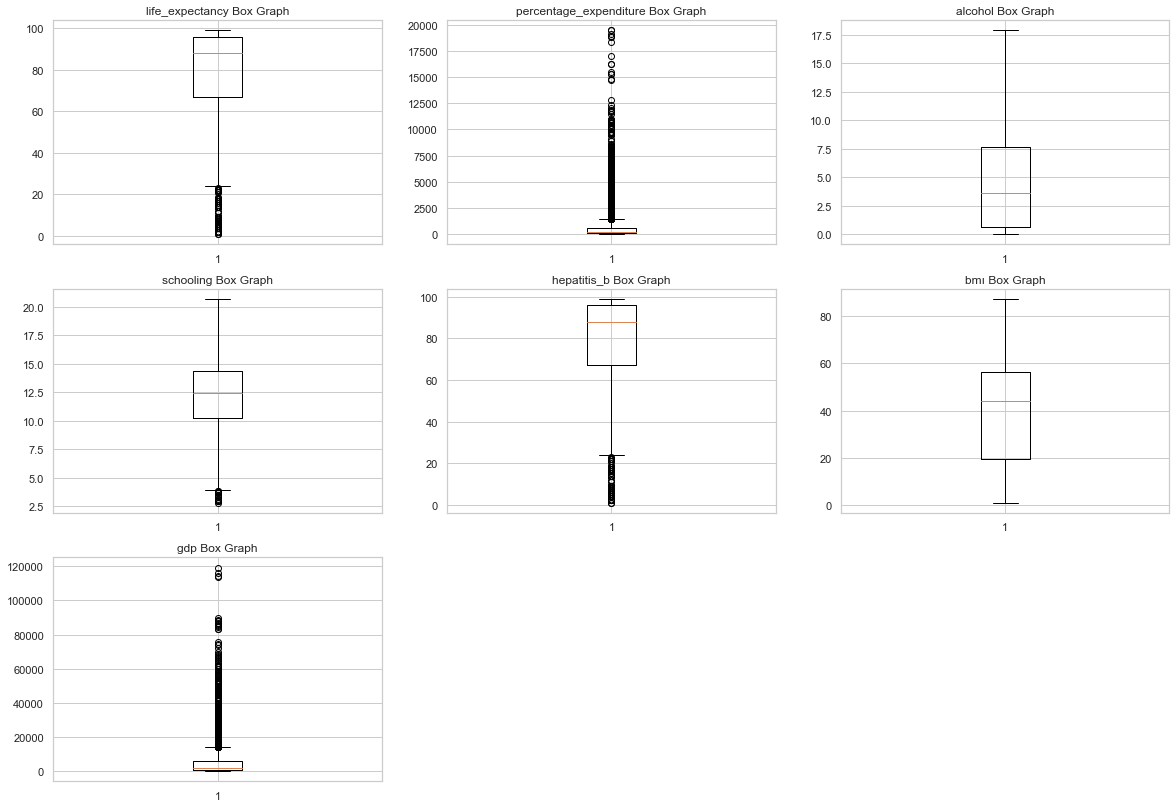

In [24]:
plt.figure(figsize=(20,14))
column_names= ["life_expectancy","percentage_expenditure", "alcohol", "schooling", "hepatitis_b", "bmı", "gdp"]
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[column_names[i]])
    plt.title("{} Box Graph".format(column_names[i], fontdict=title_font))
plt.show()
    

    

In [25]:
df.head()

,alpha_3,sub_region,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,...,Polio,total_expenditure,Diphtheria,HIV/AIDS,gdp,population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling
0,AFG,Southern Asia,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,AFG,Southern Asia,Afghanistan,2014,Developing,62.0,271.0,64.0,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,AFG,Southern Asia,Afghanistan,2013,Developing,64.0,268.0,66.0,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,AFG,Southern Asia,Afghanistan,2012,Developing,67.0,272.0,69.0,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,AFG,Southern Asia,Afghanistan,2011,Developing,68.0,275.0,71.0,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


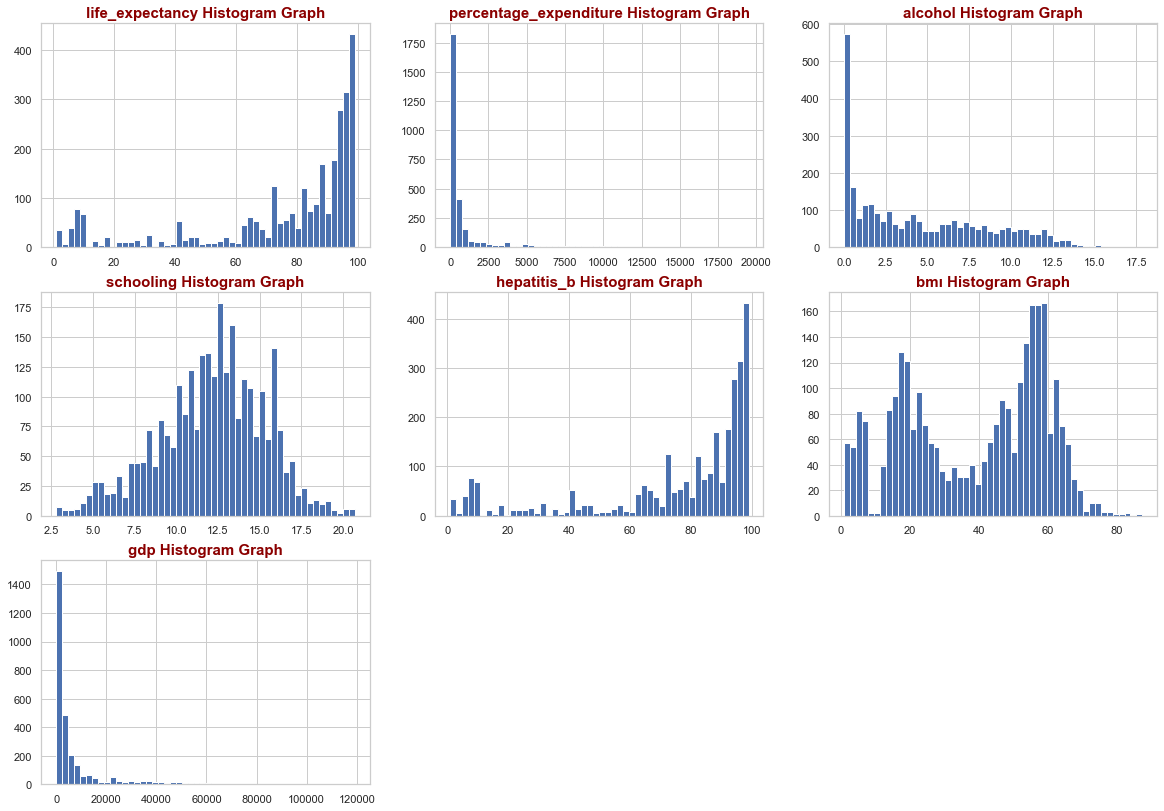

In [26]:
plt.figure(figsize=(20,14))
column_names= ["life_expectancy","percentage_expenditure", "alcohol", "schooling", "hepatitis_b", "bmı", "gdp"]
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.hist(df[column_names[i]], bins=50)
    plt.title("{} Histogram Graph".format(column_names[i]), fontdict=title_font)
plt.show()

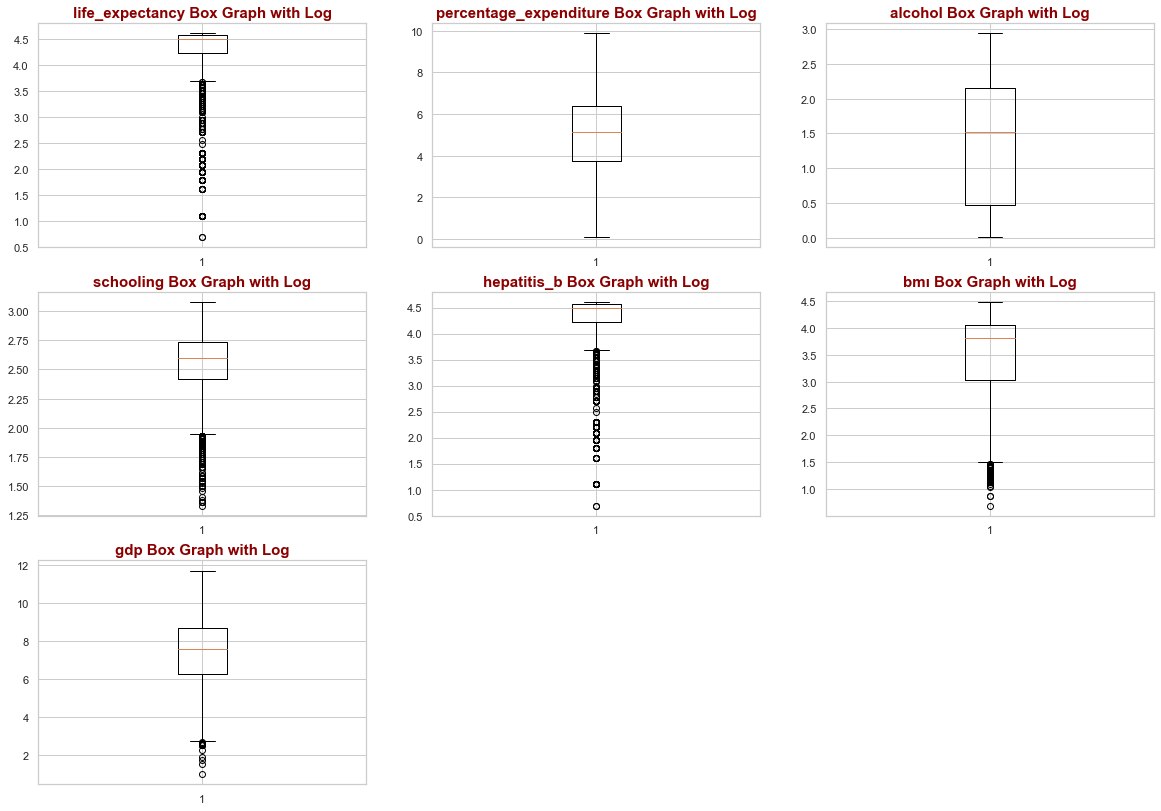

In [27]:
column_names= ["life_expectancy","percentage_expenditure", "alcohol", "schooling", "hepatitis_b", "bmı", "gdp"]
plt.figure(figsize=(20,14))
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.boxplot(np.log(df[column_names[i]]+1))
    plt.title("{} Box Graph with Log".format(column_names[i]), fontdict=title_font)
plt.show()   # percentage_expendition ve alcohol log dönüşümü sonrası aykrı değer içermiyor.
            # bmı log dönüşümü sonrası aykırı deer içermeye başladı.

#### zscore a göre aykırı değer incelemesi

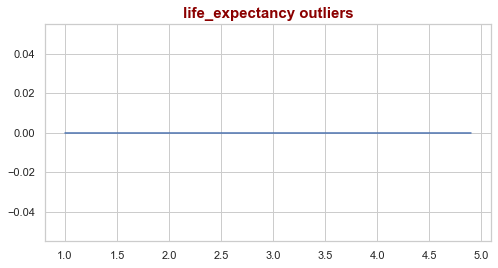

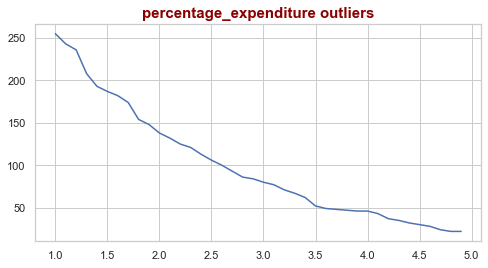

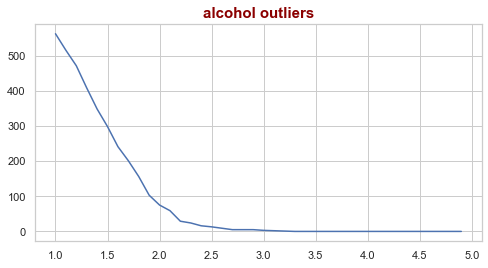

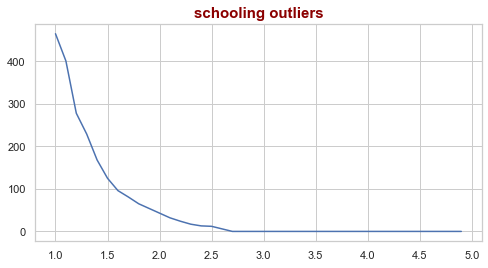

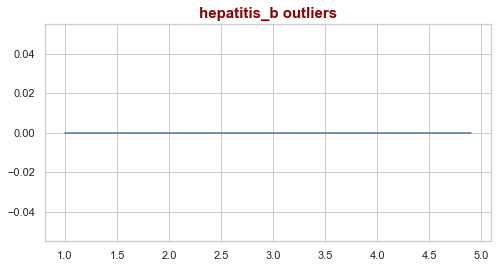

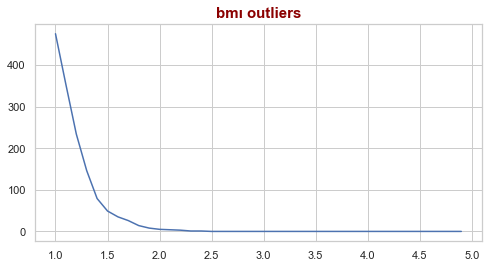

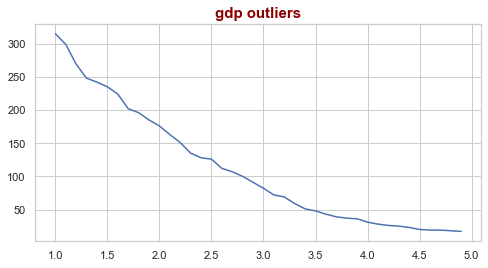

In [28]:
column_names= ["life_expectancy","percentage_expenditure", "alcohol", "schooling", "hepatitis_b", "bmı", "gdp"]
for name in range(0,7):
    zscorelist= []
    zscores= zscore(df[column_names[name]])
    for thereshold in np.arange(1,5,0.1):
        zscorelist.append((thereshold, len(np.where(zscores>thereshold)[0])))
        df_outliers= pd.DataFrame(zscorelist, columns= ["thereshold", "outliers"])
    plt.figure(figsize=(8,4))
    plt.plot(df_outliers.thereshold, df_outliers.outliers)
    plt.title("{} outliers".format(column_names[name]), fontdict=title_font)
    plt.show()
        


#### Tukey metoduna göre aykırı değer incelemesi

In [29]:
column_names= ["life_expectancy","percentage_expenditure", "alcohol", "schooling", "hepatitis_b", "bmı", "gdp"]
for name in column_names:
    q75, q25= np.percentile(df[name], [75,25])
    caa= q75-q25
    q75_log, q25_log= np.percentile(np.log(df[name]+1), [75,25])
    caa_log= q75_log, q25_log
    comparation= pd.DataFrame()
    for thereshold in np.arange(0,5,0.5):
        max_value= q75+ (caa*thereshold)
        min_value= q25- (caa*thereshold)
        max_value_log= q75+ (caa*thereshold)
        min_value_log= q25- (caa*thereshold)
        outliers= len((np.where((df[name]>max_value) | (df[name]<min_value))[0]))
        outliers_log= len((np.where((np.log(df[name]+1)>max_value_log) | (np.log(df[name]+1)<min_value_log))[0]))
        comparation= comparation.append({"thereshold": thereshold, "outliers {}".format(name): outliers,
                                         "outliers_log": outliers_log}, ignore_index=True)
    display(comparation)

,outliers life_expectancy,outliers_log,thereshold
0,1275.0,2826.0,0.0
1,496.0,2826.0,0.5
2,359.0,2826.0,1.0
3,276.0,2826.0,1.5
4,156.0,2826.0,2.0
5,0.0,0.0,2.5
6,0.0,0.0,3.0
7,0.0,0.0,3.5
8,0.0,0.0,4.0
9,0.0,0.0,4.5


,outliers percentage_expenditure,outliers_log,thereshold
0,1414.0,2826.0,0.0
1,533.0,0.0,0.5
2,441.0,0.0,1.0
3,400.0,0.0,1.5
4,366.0,0.0,2.0
5,336.0,0.0,2.5
6,304.0,0.0,3.0
7,282.0,0.0,3.5
8,269.0,0.0,4.0
9,255.0,0.0,4.5


,outliers alcohol,outliers_log,thereshold
0,1414.0,751.0,0.0
1,236.0,0.0,0.5
2,15.0,0.0,1.0
3,0.0,0.0,1.5
4,0.0,0.0,2.0
5,0.0,0.0,2.5
6,0.0,0.0,3.0
7,0.0,0.0,3.5
8,0.0,0.0,4.0
9,0.0,0.0,4.5


,outliers schooling,outliers_log,thereshold
0,1387.0,2826.0,0.0
1,479.0,2826.0,0.5
2,159.0,2826.0,1.0
3,17.0,2826.0,1.5
4,0.0,59.0,2.0
5,0.0,0.0,2.5
6,0.0,0.0,3.0
7,0.0,0.0,3.5
8,0.0,0.0,4.0
9,0.0,0.0,4.5


,outliers hepatitis_b,outliers_log,thereshold
0,1275.0,2826.0,0.0
1,496.0,2826.0,0.5
2,359.0,2826.0,1.0
3,276.0,2826.0,1.5
4,156.0,2826.0,2.0
5,0.0,0.0,2.5
6,0.0,0.0,3.0
7,0.0,0.0,3.5
8,0.0,0.0,4.0
9,0.0,0.0,4.5


,outliers bmı,outliers_log,thereshold
0,1406.0,2826.0,0.0
1,16.0,6.0,0.5
2,0.0,0.0,1.0
3,0.0,0.0,1.5
4,0.0,0.0,2.0
5,0.0,0.0,2.5
6,0.0,0.0,3.0
7,0.0,0.0,3.5
8,0.0,0.0,4.0
9,0.0,0.0,4.5


,outliers gdp,outliers_log,thereshold
0,1414.0,2826.0,0.0
1,543.0,0.0,0.5
2,473.0,0.0,1.0
3,398.0,0.0,1.5
4,347.0,0.0,2.0
5,323.0,0.0,2.5
6,303.0,0.0,3.0
7,255.0,0.0,3.5
8,236.0,0.0,4.0
9,202.0,0.0,4.5


- bmı= aykırı değer yok
- life_expectancy= winsorize
- percentage_expenditure= log dönüşümü
- alcohol= log dönüşümü
- schooling= winsorize
- hepatitis_b= winsorize
- gdp= winsorize

### Aykırı değerlerin winsorize edilerek sınırlandırılası: 

In [30]:
df["winsorize_life_expectancy"]= winsorize(df["life_expectancy"], (0.06,0.06))
df["winsorize_schooling"]= winsorize(df["schooling"], (0.155,0.155))
df["winsorize_hepatitis_b"]= winsorize(df["hepatitis_b"], (0,0.8))
df["winsorize_gdp"]= winsorize(df["gdp"], (0.05,0.05))

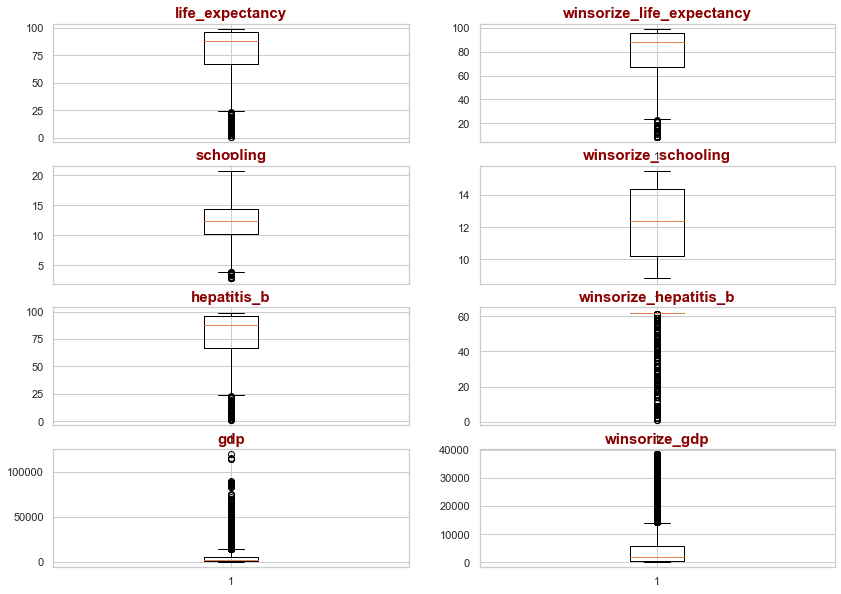

In [31]:
winsorize_columns= ["life_expectancy", "winsorize_life_expectancy", "schooling", "winsorize_schooling",
                    "hepatitis_b", "winsorize_hepatitis_b", "gdp", "winsorize_gdp"]
plt.figure(figsize=(14,10))
for i in range(0,len(winsorize_columns)):
    plt.subplot(4,2,i+1)
    plt.boxplot(df[winsorize_columns[i]])
    plt.title(winsorize_columns[i], fontdict=title_font)
    

### log dönüşümü ile aykırı değerlerden kurtulma

In [32]:
df["log_percentage_expenditure"]= np.log(df["percentage_expenditure"]+1)
df["log_alcohol"]= np.log(df["alcohol"]+1)

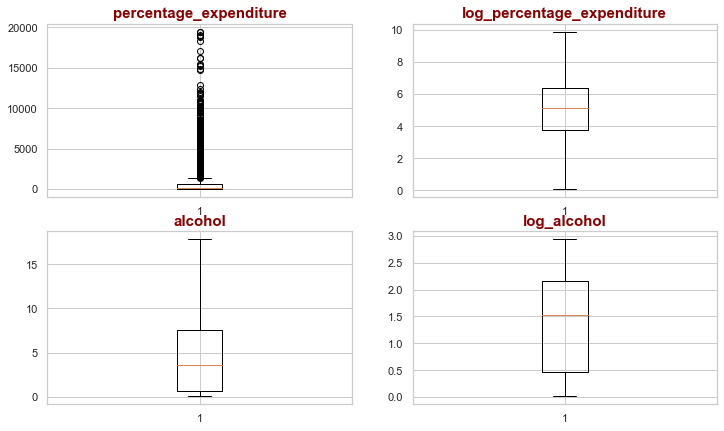

In [33]:
log_columns= ["percentage_expenditure", "log_percentage_expenditure", "alcohol", "log_alcohol"]
plt.figure(figsize=(12,7))
for i in range(0,len(log_columns)):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[log_columns[i]])
    plt.title(log_columns[i], fontdict=title_font)
plt.show()   

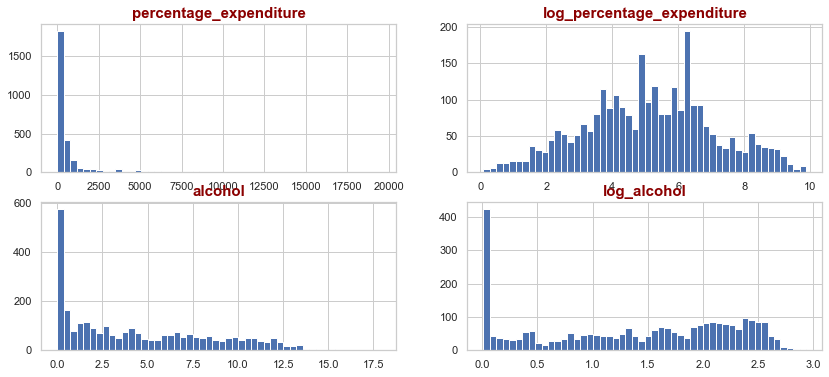

In [34]:
log_columns= ["percentage_expenditure", "log_percentage_expenditure", "alcohol", "log_alcohol"]
plt.figure(figsize=(14,6))
for i in range(len(log_columns)):
    plt.subplot(2,2,i+1)
    plt.hist(df[log_columns[i]], bins=50)
    plt.title(log_columns[i], fontdict=title_font)
plt.show()  #log dönüşümü sonrası aykırı değer değşiminin gösterimi

# 4-Keşifsel Analiz

In [35]:
pd.options.display.float_format= "{:.5f}".format
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmı,under-five deaths,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling,winsorize_life_expectancy,winsorize_schooling,winsorize_hepatitis_b,winsorize_gdp,log_percentage_expenditure,log_alcohol
count,2826.00000,2826.00000,2816.00000,1994.00000,2826.00000,2826.00000,2826.00000,1870.00000,2826.00000,2057.00000,...,2792.00000,2792.00000,2615.00000,2826.00000,2826.00000,2826.00000,2826.00000,2826.00000,2826.00000,2826.00000
mean,2007.51946,75.87106,163.30007,41.87864,4.50794,915.00504,75.87106,3317.56684,38.65713,56.25280,...,4.83628,4.87045,0.65904,12.14450,76.04869,12.25652,54.90092,6459.74679,5.12646,1.36227
std,4.61400,27.77098,123.04513,139.91662,4.08370,2132.06697,27.77098,12713.68913,20.04481,187.49405,...,4.46622,4.55692,0.16260,3.17318,27.32320,2.35490,16.62022,10281.93302,1.96986,0.88994
min,2000.00000,1.00000,1.00000,1.00000,0.01000,0.09987,1.00000,1.00000,1.00000,1.00000,...,0.10000,0.10000,0.25300,2.80000,9.00000,8.80000,1.00000,72.75931,0.09519,0.00995
25%,2004.00000,67.00000,74.00000,2.00000,0.60250,41.64947,67.00000,17.00000,19.50000,3.00000,...,1.57500,1.50000,0.52550,10.20000,67.00000,10.20000,62.00000,528.38107,3.75301,0.47156
50%,2008.00000,88.00000,143.00000,9.00000,3.58000,169.62593,88.00000,129.00000,44.20000,11.00000,...,3.30000,3.30000,0.68700,12.40000,88.00000,12.40000,62.00000,1922.54744,5.13947,1.52170
75%,2012.00000,96.00000,225.00000,32.00000,7.59750,587.39139,96.00000,1162.75000,56.30000,45.00000,...,7.20000,7.20000,0.78500,14.40000,96.00000,14.40000,62.00000,5884.81123,6.37739,2.15147
max,2015.00000,99.00000,723.00000,1800.00000,17.87000,19479.91161,99.00000,212183.00000,87.30000,2500.00000,...,27.70000,28.60000,0.94800,20.70000,99.00000,15.50000,62.00000,38334.68477,9.87719,2.93757


## Statülere göre yaşam beklentileri

In [36]:
df_status= pd.DataFrame(df.groupby("status").mean())
df_status.drop(["year"], inplace=True, axis=1)
df_status.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmı,under-five deaths,Polio,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling,winsorize_life_expectancy,winsorize_schooling,winsorize_hepatitis_b,winsorize_gdp,log_percentage_expenditure,log_alcohol
status,,,,,,,,,,,,,,,,,,,,,
Developed,81.66680,79.68555,4.00524,9.71934,3190.22034,81.66680,670.58005,51.80391,4.33178,93.73633,...,1.32070,1.29668,0.85249,15.79902,81.86602,14.98965,57.95117,17572.90081,7.06399,2.29535
Developing,74.58868,181.88108,45.89074,3.35486,411.58661,74.58868,3994.86837,35.74825,62.28161,79.84488,...,5.62575,5.67298,0.61732,11.33589,74.76154,11.65178,54.22602,4000.82939,4.69776,1.15581


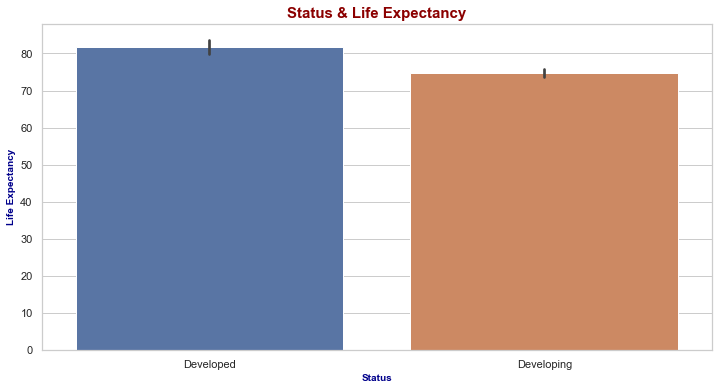

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(df["status"], df["winsorize_life_expectancy"])
plt.title("Status & Life Expectancy", fontdict=title_font)
plt.xlabel("Status", fontdict=label_font)
plt.ylabel("Life Expectancy", fontdict=label_font)
plt.show()

#### T-test

In [38]:
statu= df.status.unique()
comparasion= pd.DataFrame(columns=["group_1", "group_2", "statistics", "p_value"])
pd.options.display.float_format= "{:.6f}".format
for i in range(0,len(statu)):
    for j in range(i+1, len(statu)):
        ttest= stats.ttest_ind(df[df["status"]==statu[i]]["winsorize_life_expectancy"],
                               df[df["status"]==statu[j]]["winsorize_life_expectancy"])
        group_1= statu[i]
        group_2= statu[j]
        statistics= ttest[0]
        p_value= ttest[1]
        comparasion= comparasion.append({"group_1": group_1, "group_2": group_2, "statistics": statistics,
                                         "p_value": p_value}, ignore_index=True)
        display(comparasion)

,group_1,group_2,statistics,p_value
0,Developing,Developed,-5.349883,0.000000


### 2- Sürekli olan açıklayıcı değişkenlerle hedef değişkenin ilişkisi

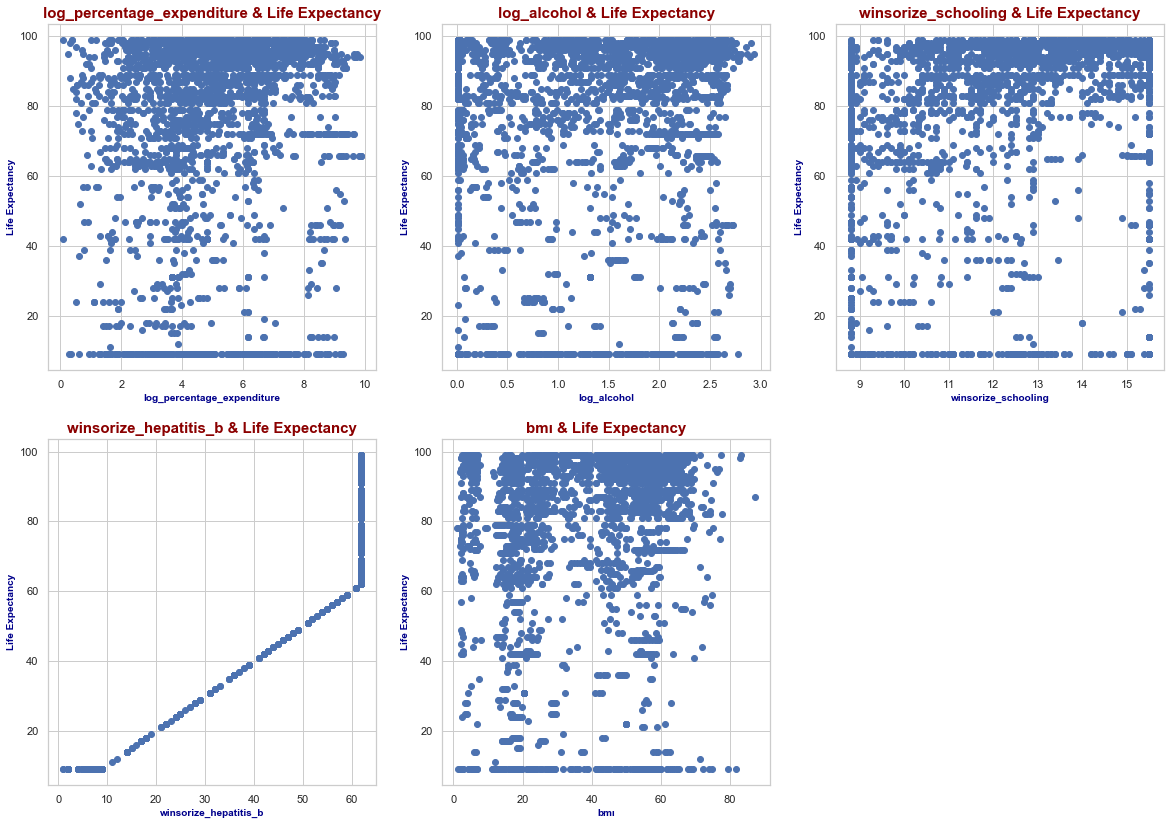

In [39]:
column_names = ["log_percentage_expenditure", "log_alcohol", "winsorize_schooling", "winsorize_hepatitis_b", "bmı"]
plt.figure(figsize=(20,14))
for i in range(0,len(column_names)):
    plt.subplot(2,3,i+1)
    plt.scatter(df[column_names[i]], df["winsorize_life_expectancy"])
    plt.title("{} & Life Expectancy".format(column_names[i]), fontdict=title_font)
    plt.xlabel(column_names[i], fontdict=label_font)
    plt.ylabel("Life Expectancy", fontdict=label_font)

    # ayrılacak renklendirilecek. seaborn hue 
plt.show()


In [40]:
df.columns

Index(['alpha_3', 'sub_region', 'country', 'year', 'status', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'bmı', 'under-five deaths ', 'Polio',
       'total_expenditure', 'Diphtheria ', ' HIV/AIDS', 'gdp', 'population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'schooling',
       'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol'],
      dtype='object')

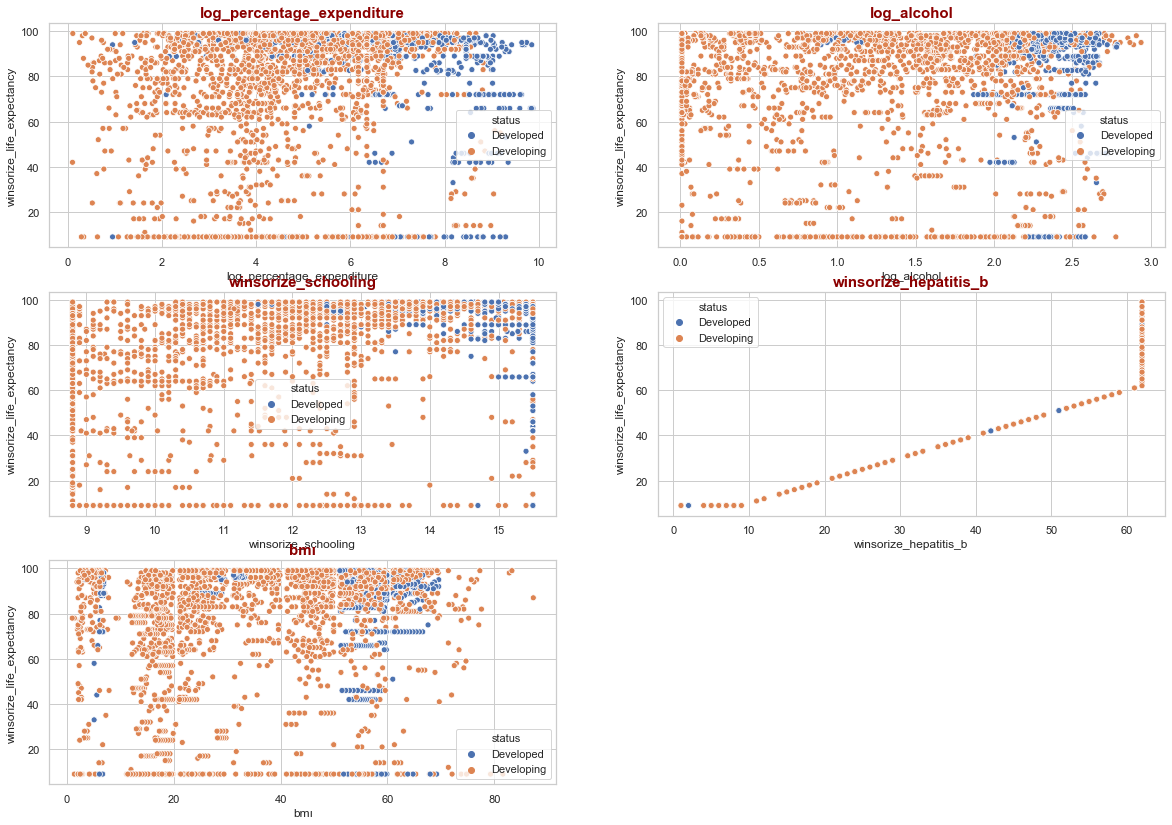

In [41]:
column_names = ["log_percentage_expenditure", "log_alcohol", "winsorize_schooling", "winsorize_hepatitis_b", "bmı"]
plt.figure(figsize=(20,14))
for i in range(len(column_names)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df, x=column_names[i], y="winsorize_life_expectancy", hue="status") # region ile denencek
    plt.title(column_names[i], fontdict=title_font)
plt.show()

#   --------Winsorize yapmadan oluşan grafikler----------

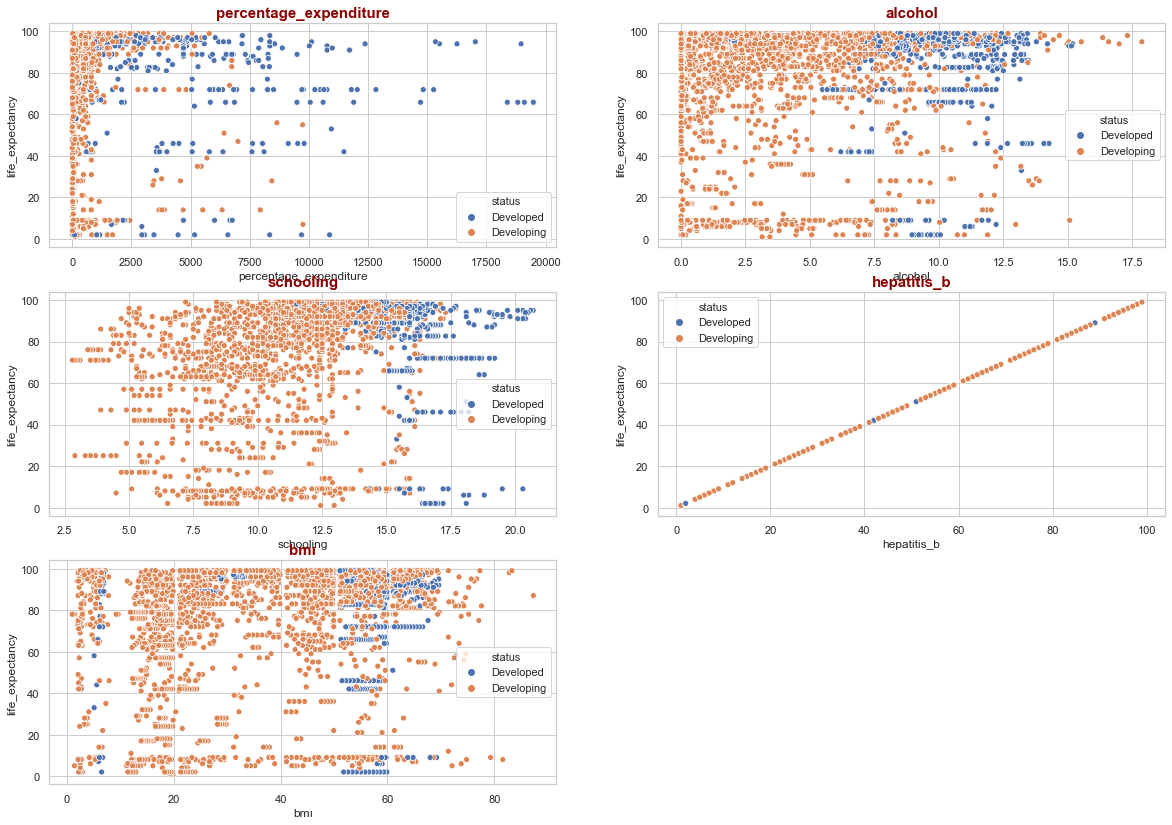

In [42]:
column_names = ["percentage_expenditure", "alcohol", "schooling", "hepatitis_b", "bmı"]
plt.figure(figsize=(20,14))
for i in range(len(column_names)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df, x=column_names[i], y="life_expectancy", hue="status") # region ile denencek
    plt.title(column_names[i], fontdict=title_font)
plt.show()

### hepsini subplot ile bir arada yapınca grafikler birbirine giriyor:

column_names = ["log_percentage_expenditure", "log_alcohol", "winsorize_schooling", "winsorize_hepatitis_b", "bmı"]
plt.figure(figsize=(25,18))
for i in range(len(column_names)):
    plt.subplot(5,1,i+1)
    sns.scatterplot(data=df, x=column_names[i], y="winsorize_life_expectancy", hue="sub_region")
    plt.title(column_names[i], fontdict=title_font)
plt.show()

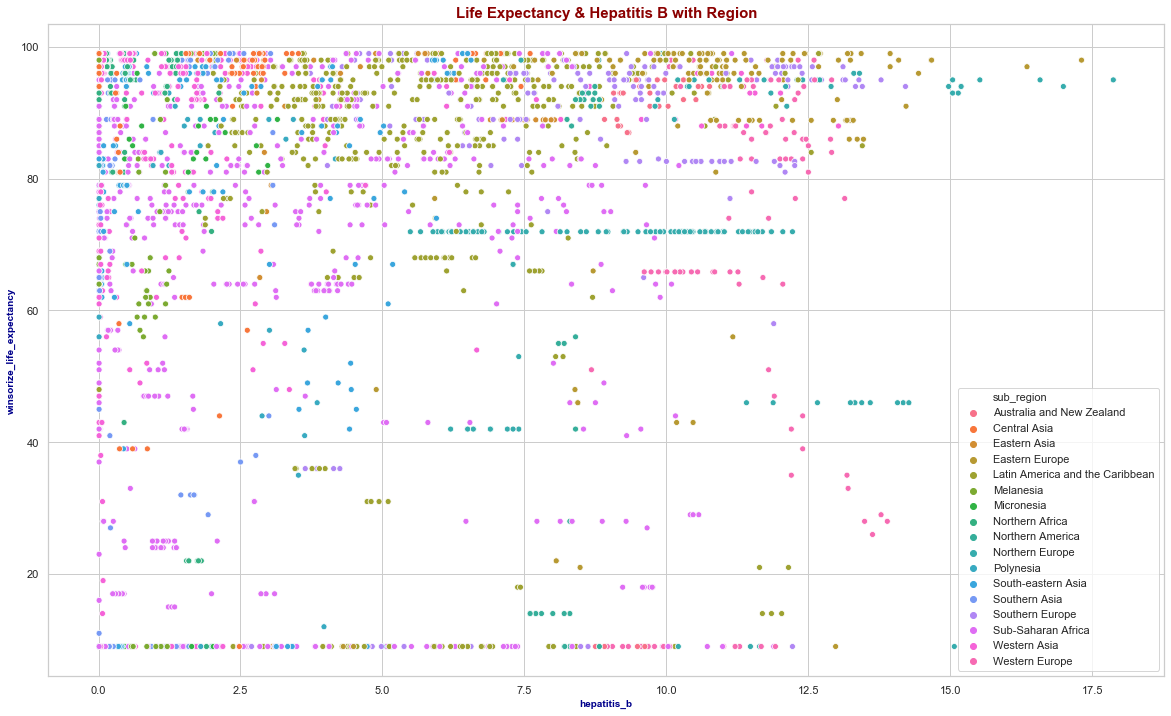

In [43]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x="alcohol", y="winsorize_life_expectancy", hue="sub_region")
plt.title("Life Expectancy & Hepatitis B with Region", fontdict=title_font)
plt.xlabel("hepatitis_b", fontdict=label_font)
plt.ylabel("winsorize_life_expectancy", fontdict=label_font)
plt.show()  # bu şekilde hepsini göstermeli miyim?

#### Correlation matrix


In [44]:
df1= df.copy()
column_names= ["winsorize_life_expectancy","log_percentage_expenditure", "log_alcohol", 
               "winsorize_schooling", "winsorize_hepatitis_b", "bmı", "country", "year"]
for col in df1.columns:
    if col not in column_names:
        df1.drop([col], inplace=True, axis=1)
df1.head()

,country,year,bmı,winsorize_life_expectancy,winsorize_schooling,winsorize_hepatitis_b,log_percentage_expenditure,log_alcohol
0,Afghanistan,2015,19.100000,65.000000,10.100000,62.000000,4.280542,0.009950
1,Afghanistan,2014,18.600000,62.000000,10.000000,62.000000,4.311116,0.009950
2,Afghanistan,2013,18.100000,64.000000,9.900000,62.000000,4.307023,0.009950
3,Afghanistan,2012,17.600000,67.000000,9.800000,62.000000,4.371777,0.009950
4,Afghanistan,2011,17.200000,68.000000,9.500000,62.000000,2.091507,0.009950


In [45]:
df1_matrix= df1.corr()
display(df1_matrix)

,year,bmı,winsorize_life_expectancy,winsorize_schooling,winsorize_hepatitis_b,log_percentage_expenditure,log_alcohol
year,1.000000,0.114560,0.235072,0.155986,0.189670,0.140480,-0.136450
bmı,0.114560,1.000000,0.210563,0.583607,0.144519,0.430034,0.297271
winsorize_life_expectancy,0.235072,0.210563,1.000000,0.289793,0.916336,0.151044,0.076389
winsorize_schooling,0.155986,0.583607,0.289793,1.000000,0.179916,0.624459,0.527187
winsorize_hepatitis_b,0.189670,0.144519,0.916336,0.179916,1.000000,0.099361,0.037339
log_percentage_expenditure,0.140480,0.430034,0.151044,0.624459,0.099361,1.000000,0.412568
log_alcohol,-0.136450,0.297271,0.076389,0.527187,0.037339,0.412568,1.000000


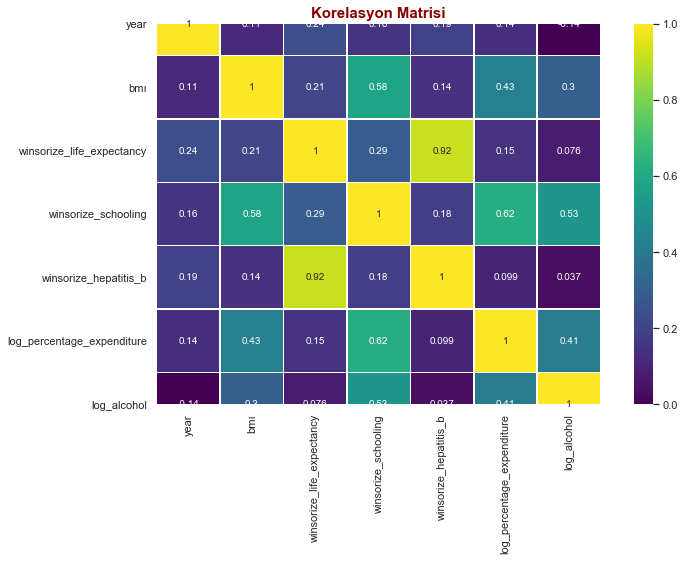

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(df1_matrix, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap="viridis")
plt.title("Korelasyon Matrisi", fontdict=title_font)
plt.show() # döngü ile ayrı ayrı çizilebilir.

### kategorik değişkenlerin dummy yapılması

In [47]:
category_col= ["sub_region", "status"]
drop_col= ["alpha_3", "country", "country", "sub_region", "status", "year"]
df2= pd.concat([df, pd.get_dummies(df[category_col])], axis=1)
df2.drop(drop_col, inplace=True, axis=1)
df2.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmı,under-five deaths,Polio,...,sub_region_Northern Europe,sub_region_Polynesia,sub_region_South-eastern Asia,sub_region_Southern Asia,sub_region_Southern Europe,sub_region_Sub-Saharan Africa,sub_region_Western Asia,sub_region_Western Europe,status_Developed,status_Developing
0,65.000000,263.000000,62.000000,0.010000,71.279624,65.000000,1154.000000,19.100000,83.000000,6.000000,...,0,0,0,1,0,0,0,0,0,1
1,62.000000,271.000000,64.000000,0.010000,73.523582,62.000000,492.000000,18.600000,86.000000,58.000000,...,0,0,0,1,0,0,0,0,0,1
2,64.000000,268.000000,66.000000,0.010000,73.219243,64.000000,430.000000,18.100000,89.000000,62.000000,...,0,0,0,1,0,0,0,0,0,1
3,67.000000,272.000000,69.000000,0.010000,78.184215,67.000000,2787.000000,17.600000,93.000000,67.000000,...,0,0,0,1,0,0,0,0,0,1
4,68.000000,275.000000,71.000000,0.010000,7.097109,68.000000,3013.000000,17.200000,97.000000,68.000000,...,0,0,0,1,0,0,0,0,0,1


In [48]:
df2.columns

Index(['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmı',
       'under-five deaths ', 'Polio', 'total_expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'gdp', 'population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'schooling',
       'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'su

### normalleştirme ve standartlaştırma

In [95]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

## -------Problem var??---------

In [96]:
df2.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmı,under-five deaths,Polio,...,norm_winsorize_schooling,norm_winsorize_hepatitis_b,norm_winsorize_gdp,scale_bmı,scale_winsorize_life_expectancy,scale_log_percentage_expenditure,scale_log_alcohol,scale_winsorize_schooling,scale_winsorize_hepatitis_b,scale_winsorize_gdp
0,65.000000,263.000000,62.000000,0.010000,71.279624,65.000000,1154.000000,19.100000,83.000000,6.000000,...,0.015223,0.020333,0.000905,-0.975843,-0.404442,-0.429506,-1.519833,-0.915921,0.427211,-0.571539
1,62.000000,271.000000,64.000000,0.010000,73.523582,62.000000,492.000000,18.600000,86.000000,58.000000,...,0.015072,0.020333,0.000949,-1.000792,-0.514258,-0.413983,-1.519833,-0.958393,0.427211,-0.568773
2,64.000000,268.000000,66.000000,0.010000,73.219243,64.000000,430.000000,18.100000,89.000000,62.000000,...,0.014922,0.020333,0.000979,-1.025740,-0.441047,-0.416061,-1.519833,-1.000866,0.427211,-0.566920
3,67.000000,272.000000,69.000000,0.010000,78.184215,67.000000,2787.000000,17.600000,93.000000,67.000000,...,0.014771,0.020333,0.001038,-1.050689,-0.331231,-0.383183,-1.519833,-1.043338,0.427211,-0.563203
4,68.000000,275.000000,71.000000,0.010000,7.097109,68.000000,3013.000000,17.200000,97.000000,68.000000,...,0.014319,0.020333,0.000113,-1.070648,-0.294626,-1.540967,-1.519833,-1.170754,0.427211,-0.621295


In [97]:
 normalize(np.array(df2["bmı"]).reshape(1,-1))
        

array([[0.00825135, 0.00803535, 0.00781935, ..., 0.01136181, 0.01118901,
        0.0110162 ]])

In [98]:
# nomalleştirme
df2["norm_bmı"]= normalize(np.array(df2["bmı"]).reshape(1,-1)).reshape(-1,1)
df2["norm_winsorize_life_expectancy"]= normalize(np.array(df2["winsorize_life_expectancy"]).reshape(1,-1)).reshape(-1,1)
df2["norm_log_percentage_expenditure"]= normalize(np.array(df2["log_percentage_expenditure"]).reshape(1,-1)).reshape(-1,1)
df2["norm_log_alcohol"]= normalize(np.array(df2["log_alcohol"]).reshape(1,-1)).reshape(-1,1)
df2["norm_winsorize_schooling"]= normalize(np.array(df2["winsorize_schooling"]).reshape(1,-1)).reshape(-1,1)
df2["norm_winsorize_hepatitis_b"]= normalize(np.array(df2["winsorize_hepatitis_b"]).reshape(1,-1)).reshape(-1,1)
df2["norm_winsorize_gdp"]= normalize(np.array(df2["winsorize_gdp"]).reshape(1,-1)).reshape(-1,1)

normal_features= ["norm_bmı", "norm_winsorize_life_expectancy", "norm_log_percentage_expenditure", "norm_log_alcohol",
                  "norm_winsorize_schooling", "norm_winsorize_hepatitis_b", "norm_winsorize_gdp"]
print("Minimum Values\n----------------")
print(df2[normal_features].min())
print("Maximum Values\n----------------")
print(df2[normal_features].max()) 




Minimum Values
----------------
norm_bmı                          0.000432
norm_winsorize_life_expectancy    0.002095
norm_log_percentage_expenditure   0.000326
norm_log_alcohol                  0.000115
norm_winsorize_schooling          0.013264
norm_winsorize_hepatitis_b        0.000328
norm_winsorize_gdp                0.000113
dtype: float64
Maximum Values
----------------
norm_bmı                          0.037714
norm_winsorize_life_expectancy    0.023046
norm_log_percentage_expenditure   0.033833
norm_log_alcohol                  0.033961
norm_winsorize_schooling          0.023362
norm_winsorize_hepatitis_b        0.020333
norm_winsorize_gdp                0.059394
dtype: float64


In [99]:
# standartlaştırma
df2["scale_bmı"]= scale(df2["bmı"])
df2["scale_winsorize_life_expectancy"]= scale(df2["winsorize_life_expectancy"])
df2["scale_log_percentage_expenditure"]= scale(df2["log_percentage_expenditure"])
df2["scale_log_alcohol"]= scale(df2["log_alcohol"])
df2["scale_winsorize_schooling"]= scale(df2["winsorize_schooling"])
df2["scale_winsorize_hepatitis_b"]= scale(df2["winsorize_hepatitis_b"])
df2["scale_winsorize_gdp"]= scale(df2["winsorize_gdp"])

scale_features= ["scale_bmı", "scale_winsorize_life_expectancy", "scale_log_percentage_expenditure", "scale_log_alcohol",
                "scale_winsorize_schooling", "scale_winsorize_hepatitis_b", "scale_winsorize_gdp"]
print("Standart Deviations\n---------")
print(df2[scale_features].std())
print("Mean Values\n--------")
print(df2[scale_features].mean())

Standart Deviations
---------
scale_bmı                          1.000177
scale_winsorize_life_expectancy    1.000177
scale_log_percentage_expenditure   1.000177
scale_log_alcohol                  1.000177
scale_winsorize_schooling          1.000177
scale_winsorize_hepatitis_b        1.000177
scale_winsorize_gdp                1.000177
dtype: float64
Mean Values
--------
scale_bmı                          -0.000000
scale_winsorize_life_expectancy    -0.000000
scale_log_percentage_expenditure   -0.000000
scale_log_alcohol                   0.000000
scale_winsorize_schooling           0.000000
scale_winsorize_hepatitis_b         0.000000
scale_winsorize_gdp                -0.000000
dtype: float64


# Regresyon Analizi

In [100]:
from sklearn import linear_model
import statsmodels.api as sm

In [101]:
df2.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmı,under-five deaths,Polio,...,norm_winsorize_schooling,norm_winsorize_hepatitis_b,norm_winsorize_gdp,scale_bmı,scale_winsorize_life_expectancy,scale_log_percentage_expenditure,scale_log_alcohol,scale_winsorize_schooling,scale_winsorize_hepatitis_b,scale_winsorize_gdp
0,65.000000,263.000000,62.000000,0.010000,71.279624,65.000000,1154.000000,19.100000,83.000000,6.000000,...,0.015223,0.020333,0.000905,-0.975843,-0.404442,-0.429506,-1.519833,-0.915921,0.427211,-0.571539
1,62.000000,271.000000,64.000000,0.010000,73.523582,62.000000,492.000000,18.600000,86.000000,58.000000,...,0.015072,0.020333,0.000949,-1.000792,-0.514258,-0.413983,-1.519833,-0.958393,0.427211,-0.568773
2,64.000000,268.000000,66.000000,0.010000,73.219243,64.000000,430.000000,18.100000,89.000000,62.000000,...,0.014922,0.020333,0.000979,-1.025740,-0.441047,-0.416061,-1.519833,-1.000866,0.427211,-0.566920
3,67.000000,272.000000,69.000000,0.010000,78.184215,67.000000,2787.000000,17.600000,93.000000,67.000000,...,0.014771,0.020333,0.001038,-1.050689,-0.331231,-0.383183,-1.519833,-1.043338,0.427211,-0.563203
4,68.000000,275.000000,71.000000,0.010000,7.097109,68.000000,3013.000000,17.200000,97.000000,68.000000,...,0.014319,0.020333,0.000113,-1.070648,-0.294626,-1.540967,-1.519833,-1.170754,0.427211,-0.621295


In [102]:
df2.columns

Index(['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmı',
       'under-five deaths ', 'Polio', 'total_expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'gdp', 'population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'schooling',
       'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'su

In [103]:
df3= df2.copy()
df3.drop(['life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles',
       'under-five deaths ', 'Polio', 'total_expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'gdp', 'population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'schooling'], inplace=True, axis=1)
df3.columns #regresyon analizimi yapacağım dataframe bu.

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'norm_bmı', 'norm_winsorize_life_expectancy',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp', 'scale_

### OLS-1: Normalize ve scale olmadığı analiz: 
Not: En yüksek R kare değerini yakaladığım analiz.

In [166]:
df_r= df3.copy()

df_r.drop(['norm_bmı', 'norm_winsorize_life_expectancy',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp', 'scale_bmı', 'scale_winsorize_life_expectancy',
       'scale_log_percentage_expenditure', 'scale_log_alcohol',
       'scale_winsorize_schooling', 'scale_winsorize_hepatitis_b',
       'scale_winsorize_gdp'], inplace=True, axis=1)
df_r.columns

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing'],
      dtype='object')

In [167]:
request_col= []
for i in df_r.columns:
    if i != "winsorize_life_expectancy":
        request_col.append(i)
request_col

['bmı',
 'winsorize_schooling',
 'winsorize_hepatitis_b',
 'winsorize_gdp',
 'log_percentage_expenditure',
 'log_alcohol',
 'sub_region_Australia and New Zealand',
 'sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing']

In [168]:
Y= df_r["winsorize_life_expectancy"]
X= df_r[request_col]
X= sm.add_constant(X)
model_1= sm.OLS(Y,X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.883
Model:                                   OLS   Adj. R-squared:                  0.882
Method:                        Least Squares   F-statistic:                     918.9
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:09:57   Log-Likelihood:                -10326.
No. Observations:                       2826   AIC:                         2.070e+04
Df Residuals:                           2802   BIC:                         2.084e+04
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -21.3965      1.094    -19.561      0.000     -23.541     -19.252
bmı                                            0.0214      0.014      1.558      0.119      -0.006       0.048
winsorize_schooling                            2.2778      0.133     17.098      0.000       2.017       2.539
winsorize_hepatitis_b                          1.4257      0.011    127.991      0.000       1.404       1.448
winsorize_gdp                              -7.593e-05    2.9e-05     -2.617      0.009      -0.000    -1.9e-05
log_percentage_expenditure                     0.4345      0.152      2.861      0.004       0.137       0.732
log_alcohol                                   -0.0249      0.299     -0.083      0.934      -0.612       0.562
sub_region_Australia and New Zealand          -4.0294      1.705     -2.363      0.018      -7.372      -0.686
sub_region_Central Asia                        7.8055      1.060      7.364      0.000       5.727       9.884
sub_region_Eastern Asia                        4.4341      1.323      3.350      0.001       1.839       7.029
sub_region_Eastern Europe                      1.1000      0.910      1.209      0.227      -0.684       2.884
sub_region_Latin America and the Caribbean     1.5694      0.563      2.789      0.005       0.466       2.673
sub_region_Melanesia                          -2.2139      1.186     -1.867      0.062      -4.539       0.111
sub_region_Micronesia                          0.8042      1.588      0.506      0.613      -2.310       3.918
sub_region_Northern Africa                     6.3582      1.002      6.347      0.000       4.394       8.322
sub_region_Northern America                  -10.0372      1.683     -5.965      0.000     -13.337      -6.738
sub_region_Northern Europe                   -16.2051      0.903    -17.947      0.000     -17.976     -14.435
sub_region_Polynesia                          -8.7295      1.572     -5.552      0.000     -11.813      -5.646
sub_region_South-eastern Asia                  2.3358      0.806      2.897      0.004       0.755       3.917
sub_region_Southern Asia                       4.4053      0.907      4.857      0.000       2.627       6.184
sub_region_Southern Europe                    -1.6163      0.785     -2.060      0.039      -3.155      -0.078
sub_region_Sub-Saharan Africa                  0.8554      0.600      1.426      0.154      -0.321       2.032
sub_region_Western Asia                        1.6230      0.646      2.511      0.012       0.355       2.891
sub_region_Western Europe                     -9.8560      1.056     -9.331      0.000     -11.927      -7.785
status_De

### OLS-2 dummy'lerin olmadığı analiz:

In [169]:
request_col= ["bmı", "winsorize_life_expectancy", "log_percentage_expenditure", "log_alcohol",
                "winsorize_schooling", "winsorize_hepatitis_b", "winsorize_gdp"]
df_r= df3.copy()
for i in df3.columns:
    if i not in request_col:
        df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol'],
      dtype='object')

In [171]:
request_col= []
for i in df_r.columns:
    if i != "winsorize_life_expectancy":
        request_col.append(i)
request_col

['bmı',
 'winsorize_schooling',
 'winsorize_hepatitis_b',
 'winsorize_gdp',
 'log_percentage_expenditure',
 'log_alcohol']

In [173]:
Y= df_r["winsorize_life_expectancy"]
X= df_r[request_col]
X= sm.add_constant(X)
model_2= sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.860
Model:                                   OLS   Adj. R-squared:                  0.860
Method:                        Least Squares   F-statistic:                     2883.
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:12:05   Log-Likelihood:                -10580.
No. Observations:                       2826   AIC:                         2.117e+04
Df Residuals:                           2819   BIC:                         2.122e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -27.4502      1.280    -21.453      0.000     -29.959     -24.941
bmı                            0.0109      0.012      0.916      0.360      -0.012       0.034
winsorize_schooling            1.9514      0.128     15.290      0.000       1.701       2.202
winsorize_hepatitis_b          1.4571      0.012    122.851      0.000       1.434       1.480
winsorize_gdp                 -0.0002   2.83e-05     -7.393      0.000      -0.000      -0.000
log_percentage_expenditure     0.3705      0.162      2.286      0.022       0.053       0.688
log_alcohol                   -1.0146      0.258     -3.940      0.000      -1.519      -0.510
==============================================================================
Omnibus:                      230.782   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.057
Skew:                          -0.648   Prob(JB):                     6.71e-51
Kurtosis:                       2.468   Cond. No.                     8.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS-3: normalizasyonlu analiz:

In [184]:
request_col= ["norm_bmı", "norm_winsorize_life_expectancy", "norm_log_percentage_expenditure", "norm_log_alcohol",
                "norm_winsorize_schooling", "norm_winsorize_hepatitis_b", "norm_winsorize_gdp",'sub_region_Central Asia', 'sub_region_Eastern Asia',
           'sub_region_Eastern Europe',
           'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
           'sub_region_Micronesia', 'sub_region_Northern Africa',
           'sub_region_Northern America', 'sub_region_Northern Europe',
           'sub_region_Polynesia', 'sub_region_South-eastern Asia',
           'sub_region_Southern Asia', 'sub_region_Southern Europe',
           'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
           'sub_region_Western Europe', 'status_Developed', 'status_Developing']
df_r= df3.copy()
for i in df3.columns:
    if i not in request_col:
        df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'norm_bmı', 'norm_winsorize_life_expectancy',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp'],
      dtype='object')

In [185]:
request_col= []
refuse_col= ["norm_winsorize_life_expectancy"]
for i in df_r.columns:
    if i not in refuse_col:
        request_col.append(i)
request_col

['sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing',
 'norm_bmı',
 'norm_log_percentage_expenditure',
 'norm_log_alcohol',
 'norm_winsorize_schooling',
 'norm_winsorize_hepatitis_b',
 'norm_winsorize_gdp']

In [186]:
Y= df_r["norm_winsorize_life_expectancy"]
X= df_r[request_col]
X= sm.add_constant(X)
model_3= sm.OLS(Y,X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     norm_winsorize_life_expectancy   R-squared:                       0.883
Model:                                        OLS   Adj. R-squared:                  0.882
Method:                             Least Squares   F-statistic:                     918.9
Date:                            Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                                    01:17:54   Log-Likelihood:                 13314.
No. Observations:                            2826   AIC:                        -2.658e+04
Df Residuals:                                2802   BIC:                        -2.644e+04
Df Model:                                      23                                         
Covariance Type:                        nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0056      0.000    -14.118      0.000      -0.006      -0.005
sub_region_Central Asia                        0.0028      0.001      5.490      0.000       0.002       0.004
sub_region_Eastern Asia                        0.0020      0.001      3.776      0.000       0.001       0.003
sub_region_Eastern Europe                      0.0012      0.000      2.731      0.006       0.000       0.002
sub_region_Latin America and the Caribbean     0.0013      0.000      2.967      0.003       0.000       0.002
sub_region_Melanesia                           0.0004      0.001      0.808      0.419      -0.001       0.001
sub_region_Micronesia                          0.0011      0.001      1.944      0.052   -9.55e-06       0.002
sub_region_Northern Africa                     0.0024      0.000      4.890      0.000       0.001       0.003
sub_region_Northern America                   -0.0014      0.001     -2.511      0.012      -0.002      -0.000
sub_region_Northern Europe                    -0.0028      0.000     -6.673      0.000      -0.004      -0.002
sub_region_Polynesia                          -0.0011      0.001     -1.918      0.055      -0.002    2.43e-05
sub_region_South-eastern Asia                  0.0015      0.000      3.144      0.002       0.001       0.002
sub_region_Southern Asia                       0.0020      0.000      3.995      0.000       0.001       0.003
sub_region_Southern Europe                     0.0006      0.000      1.310      0.190      -0.000       0.001
sub_region_Sub-Saharan Africa                  0.0011      0.000      2.470      0.014       0.000       0.002
sub_region_Western Asia                        0.0013      0.000      2.924      0.003       0.000       0.002
sub_region_Western Europe                     -0.0014      0.000     -3.076      0.002      -0.002      -0.000
status_Developed                              -0.0026      0.000    -12.230      0.000      -0.003      -0.002
status_Developing                             -0.0030      0.000    -13.532      0.000      -0.003      -0.003
norm_bmı                                       0.0116      0.007      1.558      0.119      -0.003       0.026
norm_log_percentage_expenditure                0.0295      0.010      2.861      0.004       0.009       0.050
norm_log_alcohol                              -0.0005      0.006     -0.083      0.934      -0.012       0.011
norm_winsorize_schooling                       0.3518      0.021     17.098      0.000       0.311       0.392
norm_winsorize_hepatitis_b                     1.0121      0.008 

### OLS-5: standartlaştırılmış analiz:

In [187]:
df3.columns

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'norm_bmı', 'norm_winsorize_life_expectancy',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp', 'scale_

In [188]:
df_r= df3.copy()
request_col= ['scale_bmı', 'scale_winsorize_life_expectancy',
       'scale_log_percentage_expenditure', 'scale_log_alcohol',
       'scale_winsorize_schooling', 'scale_winsorize_hepatitis_b',
       'scale_winsorize_gdp', 'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing']
for i in df_r.columns:
    if i not in request_col:
        df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'scale_bmı', 'scale_winsorize_life_expectancy',
       'scale_log_percentage_expenditure', 'scale_log_alcohol',
       'scale_winsorize_schooling', 'scale_winsorize_hepatitis_b',
       'scale_winsorize_gdp'],
      dtype='object')

In [189]:
request_col= []
for i in df_r.columns:
    if i != "scale_winsorize_life_expectancy":
        request_col.append(i)
request_col

['sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing',
 'scale_bmı',
 'scale_log_percentage_expenditure',
 'scale_log_alcohol',
 'scale_winsorize_schooling',
 'scale_winsorize_hepatitis_b',
 'scale_winsorize_gdp']

In [190]:
Y=df_r["scale_winsorize_life_expectancy"]
X=df_r[request_col]
X= sm.add_constant(X)
model_4= sm.OLS(Y,X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     scale_winsorize_life_expectancy   R-squared:                       0.883
Model:                                         OLS   Adj. R-squared:                  0.882
Method:                              Least Squares   F-statistic:                     918.9
Date:                             Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                                     01:18:12   Log-Likelihood:                -978.88
No. Observations:                             2826   AIC:                             2006.
Df Residuals:                                 2802   BIC:                             2148.
Df Model:                                       23                                         
Covariance Type:                         nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0842      0.043     -1.963      0.050      -0.168      -0.000
sub_region_Central Asia                        0.4332      0.079      5.490      0.000       0.278       0.588
sub_region_Eastern Asia                        0.3098      0.082      3.776      0.000       0.149       0.471
sub_region_Eastern Europe                      0.1878      0.069      2.731      0.006       0.053       0.323
sub_region_Latin America and the Caribbean     0.2049      0.069      2.967      0.003       0.070       0.340
sub_region_Melanesia                           0.0665      0.082      0.808      0.419      -0.095       0.228
sub_region_Micronesia                          0.1769      0.091      1.944      0.052      -0.002       0.355
sub_region_Northern Africa                     0.3802      0.078      4.890      0.000       0.228       0.533
sub_region_Northern America                   -0.2199      0.088     -2.511      0.012      -0.392      -0.048
sub_region_Northern Europe                    -0.4457      0.067     -6.673      0.000      -0.577      -0.315
sub_region_Polynesia                          -0.1721      0.090     -1.918      0.055      -0.348       0.004
sub_region_South-eastern Asia                  0.2330      0.074      3.144      0.002       0.088       0.378
sub_region_Southern Asia                       0.3088      0.077      3.995      0.000       0.157       0.460
sub_region_Southern Europe                     0.0883      0.067      1.310      0.190      -0.044       0.221
sub_region_Sub-Saharan Africa                  0.1788      0.072      2.470      0.014       0.037       0.321
sub_region_Western Asia                        0.2069      0.071      2.924      0.003       0.068       0.346
sub_region_Western Europe                     -0.2133      0.069     -3.076      0.002      -0.349      -0.077
status_Developed                              -0.0163      0.024     -0.686      0.493      -0.063       0.030
status_Developing                             -0.0679      0.027     -2.486      0.013      -0.121      -0.014
scale_bmı                                      0.0157      0.010      1.558      0.119      -0.004       0.036
scale_log_percentage_expenditure               0.0313      0.011      2.861      0.004       0.010       0.053
scale_log_alcohol                             -0.0008      0.010     -0.083      0.934      -0.020       0.018
scale_winsorize_schooling                      0.1963      0.011     17.098      0.000       0.174       0.219
scale_winsorize_hepatitis_b                    0.8673 

### OLS-5 Sadece dummy'lerin analizi:

In [191]:
df_r= df3.copy()
request_col= ["winsorize_life_expectancy",'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing']
for i in df_r.columns:
    if i not in request_col:
        df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['winsorize_life_expectancy', 'sub_region_Central Asia',
       'sub_region_Eastern Asia', 'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing'],
      dtype='object')

In [192]:
request_col= []
for i in df_r.columns:
    if i != "winsorize_life_expectancy":
        request_col.append(i)
request_col

['sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing']

In [193]:
Y=df_r["winsorize_life_expectancy"]
X=df_r[request_col]
X= sm.add_constant(X)
model_5= sm.OLS(Y,X).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.125
Model:                                   OLS   Adj. R-squared:                  0.119
Method:                        Least Squares   F-statistic:                     23.50
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):           4.00e-69
Time:                               01:19:27   Log-Likelihood:                -13169.
No. Observations:                       2826   AIC:                         2.637e+04
Df Residuals:                           2808   BIC:                         2.648e+04
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         49.7740      3.095     16.083      0.000      43.706      55.842
sub_region_Central Asia                       22.5280      5.725      3.935      0.000      11.303      33.753
sub_region_Eastern Asia                       16.7645      6.002      2.793      0.005       4.995      28.534
sub_region_Eastern Europe                     11.8849      5.056      2.351      0.019       1.972      21.798
sub_region_Latin America and the Caribbean    15.3721      5.086      3.022      0.003       5.399      25.346
sub_region_Melanesia                           5.3187      5.901      0.901      0.368      -6.253      16.890
sub_region_Micronesia                          7.0620      6.583      1.073      0.283      -5.846      19.970
sub_region_Northern Africa                    17.9280      5.604      3.199      0.001       6.940      28.916
sub_region_Northern America                  -20.8172      6.488     -3.208      0.001     -33.539      -8.095
sub_region_Northern Europe                    -7.0019      4.982     -1.406      0.160     -16.770       2.766
sub_region_Polynesia                          -1.8809      6.583     -0.286      0.775     -14.789      11.028
sub_region_South-eastern Asia                  8.0653      5.253      1.535      0.125      -2.235      18.365
sub_region_Southern Asia                       4.7197      5.396      0.875      0.382      -5.861      15.300
sub_region_Southern Europe                     7.3716      5.010      1.471      0.141      -2.452      17.196
sub_region_Sub-Saharan Africa                 -2.5483      5.046     -0.505      0.614     -12.443       7.346
sub_region_Western Asia                       15.6970      5.149      3.049      0.002       5.601      25.793
sub_region_Western Europe                    -12.9201      5.144     -2.512      0.012     -23.006      -2.834
status_Developed                              32.0385      1.652     19.398      0.000      28.800      35.277
status_Developing                             17.7355      2.016      8.799      0.000      13.783      21.688
==============================================================================
Omnibus:                      596.221   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.169
Skew:                          -1.368   Prob(JB):                    4.08e-228
Kurtosis:                       4.186   Cond. No.                     2.44e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

### OLS-6 sağlık ile ilgili kolonların analizi:

In [194]:
df_r= df3.copy()
request_col= ['winsorize_life_expectancy','winsorize_hepatitis_b',
              'log_percentage_expenditure', 'log_alcohol', 'bmı']
for i in df_r.columns:
    if i not in request_col:
        df_r.drop([i], inplace=True, axis=1)
df_r.columns

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_hepatitis_b',
       'log_percentage_expenditure', 'log_alcohol'],
      dtype='object')

In [195]:
request_col= []
for i in df_r.columns:
    if i != "winsorize_life_expectancy":
        request_col.append(i)
request_col

['bmı', 'winsorize_hepatitis_b', 'log_percentage_expenditure', 'log_alcohol']

In [196]:
Y=df_r["winsorize_life_expectancy"]
X= df_r[request_col]
X= sm.add_constant(X)
model_6= sm.OLS(Y,X).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.847
Model:                                   OLS   Adj. R-squared:                  0.847
Method:                        Least Squares   F-statistic:                     3901.
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:20:47   Log-Likelihood:                -10705.
No. Observations:                       2826   AIC:                         2.142e+04
Df Residuals:                           2821   BIC:                         2.145e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -11.4395      0.845    -13.534      0.000     -13.097      -9.782
bmı                            0.0873      0.011      7.715      0.000       0.065       0.110
winsorize_hepatitis_b          1.4858      0.012    121.261      0.000       1.462       1.510
log_percentage_expenditure     0.4005      0.120      3.336      0.001       0.165       0.636
log_alcohol                    0.3588      0.251      1.429      0.153      -0.133       0.851
==============================================================================
Omnibus:                      311.909   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.143
Skew:                          -0.680   Prob(JB):                     1.32e-59
Kurtosis:                       2.325   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresyon ile tahmin:

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

### Tahmin-1 Normalize ve scale olmayan analiz:

In [199]:
df_t= df3.copy()
request_col= ['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing']
for i in df3.columns:
    if i not in request_col:
        df_t.drop([i], inplace=True, axis=1)
df_t.columns

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing'],
      dtype='object')

In [200]:
request_col= []
for i in df_t.columns:
    if i != "winsorize_life_expectancy":
        request_col.append(i)
request_col

['bmı',
 'winsorize_schooling',
 'winsorize_hepatitis_b',
 'winsorize_gdp',
 'log_percentage_expenditure',
 'log_alcohol',
 'sub_region_Australia and New Zealand',
 'sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing']

In [201]:
Y= df_t["winsorize_life_expectancy"]
X= df_t[request_col]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

print("Eğitim kümesindeki eleman sayısı: {}".format(X_train.shape[0]))
print("Test kümesindeki eleman sayısı: {}".format(X_test.shape[0]))


Eğitim kümesindeki eleman sayısı: 2260
Test kümesindeki eleman sayısı: 566


In [202]:
X_train = sm.add_constant(X_train)
model_1= sm.OLS(Y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.882
Model:                                   OLS   Adj. R-squared:                  0.881
Method:                        Least Squares   F-statistic:                     730.0
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:23:16   Log-Likelihood:                -8241.1
No. Observations:                       2260   AIC:                         1.653e+04
Df Residuals:                           2236   BIC:                         1.667e+04
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -21.4010      1.213    -17.648      0.000     -23.779     -19.023
bmı                                            0.0362      0.015      2.354      0.019       0.006       0.066
winsorize_schooling                            2.2718      0.147     15.443      0.000       1.983       2.560
winsorize_hepatitis_b                          1.4281      0.013    113.339      0.000       1.403       1.453
winsorize_gdp                              -5.414e-05   3.28e-05     -1.648      0.099      -0.000    1.03e-05
log_percentage_expenditure                     0.2853      0.169      1.691      0.091      -0.046       0.616
log_alcohol                                    0.0183      0.335      0.055      0.956      -0.639       0.675
sub_region_Australia and New Zealand          -4.8843      1.950     -2.504      0.012      -8.709      -1.060
sub_region_Central Asia                        8.1015      1.156      7.010      0.000       5.835      10.368
sub_region_Eastern Asia                        5.0131      1.381      3.631      0.000       2.306       7.721
sub_region_Eastern Europe                      0.6188      1.006      0.615      0.539      -1.354       2.592
sub_region_Latin America and the Caribbean     1.5466      0.634      2.439      0.015       0.303       2.790
sub_region_Melanesia                          -1.3113      1.330     -0.986      0.324      -3.919       1.296
sub_region_Micronesia                         -0.1874      1.795     -0.104      0.917      -3.707       3.332
sub_region_Northern Africa                     5.9034      1.068      5.529      0.000       3.809       7.997
sub_region_Northern America                   -8.1179      2.003     -4.052      0.000     -12.047      -4.189
sub_region_Northern Europe                   -16.1740      1.039    -15.570      0.000     -18.211     -14.137
sub_region_Polynesia                          -8.7818      1.750     -5.019      0.000     -12.213      -5.350
sub_region_South-eastern Asia                  2.1685      0.908      2.387      0.017       0.387       3.950
sub_region_Southern Asia                       4.9014      0.998      4.909      0.000       2.944       6.859
sub_region_Southern Europe                    -2.2054      0.872     -2.529      0.012      -3.916      -0.495
sub_region_Sub-Saharan Africa                  1.0645      0.669      1.592      0.112      -0.247       2.376
sub_region_Western Asia                        1.6617      0.713      2.329      0.020       0.263       3.061
sub_region_Western Europe                    -10.7185      1.178     -9.096      0.000     -13.029      -8.408
status_De

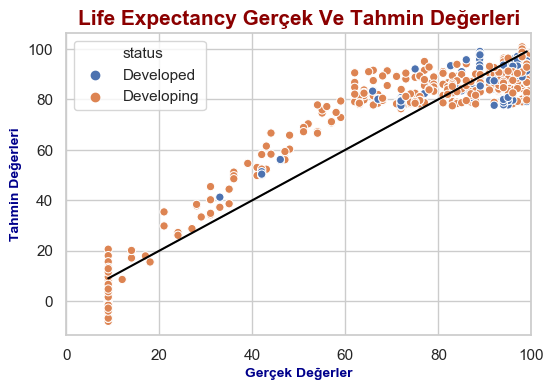

Ortalama Mutlak Hata (MAE): 7.992669904561155
Ortalama Kare Hata (MSE): 93.640674895393
Kök Ortalama Kare Error (RMSE): 9.67681119457195
Ortalama Mutlak Yüzde Hata (MAPE): 17.60196893860071


In [204]:
X_test= sm.add_constant(X_test)
Y_preds= model_1.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue=df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.xlim(0,100)
plt.title("Life Expectancy Gerçek Ve Tahmin Değerleri", fontdict=title_font) 
plt.xlabel("Gerçek Değerler", fontdict=label_font)
plt.ylabel("Tahmin Değerleri", fontdict=label_font)
plt.show()

print("Ortalama Mutlak Hata (MAE): {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Ortalama Kare Hata (MSE): {}".format(mse(Y_test, Y_preds)))
print("Kök Ortalama Kare Error (RMSE): {}".format(rmse(Y_test, Y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE): {}".format(np.mean(np.abs((Y_test-Y_preds) / Y_test))*100))

### Regresyon tahmin modeli 2: Sadece dummy değişkenleri ile

In [213]:
df_t= df3.copy()
request_col= ['winsorize_life_expectancy','sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing']
for i in df_t.columns:
    if i not in request_col:
        df_t.drop([i], inplace=True, axis=1)
request_col

['winsorize_life_expectancy',
 'sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing']

In [214]:
request_col= []
for i in df_t.columns:
    if i != "winsorize_life_expectancy":
        request_col.append(i)

In [215]:
request_col

['sub_region_Central Asia',
 'sub_region_Eastern Asia',
 'sub_region_Eastern Europe',
 'sub_region_Latin America and the Caribbean',
 'sub_region_Melanesia',
 'sub_region_Micronesia',
 'sub_region_Northern Africa',
 'sub_region_Northern America',
 'sub_region_Northern Europe',
 'sub_region_Polynesia',
 'sub_region_South-eastern Asia',
 'sub_region_Southern Asia',
 'sub_region_Southern Europe',
 'sub_region_Sub-Saharan Africa',
 'sub_region_Western Asia',
 'sub_region_Western Europe',
 'status_Developed',
 'status_Developing']

In [216]:
Y= df_t["winsorize_life_expectancy"]
X= df_t[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

print("Eğitim kümesi eleman sayısı: {}".format(X_train.shape[0]))
print("Test kümesi eleman sayısı: {}".format(X_test.shape[0]))



Eğitim kümesi eleman sayısı: 2260
Test kümesi eleman sayısı: 566


In [217]:
X_train= sm.add_constant(X_train)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.125
Model:                                   OLS   Adj. R-squared:                  0.119
Method:                        Least Squares   F-statistic:                     23.50
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):           4.00e-69
Time:                               01:28:40   Log-Likelihood:                -13169.
No. Observations:                       2826   AIC:                         2.637e+04
Df Residuals:                           2808   BIC:                         2.648e+04
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         49.7740      3.095     16.083      0.000      43.706      55.842
sub_region_Central Asia                       22.5280      5.725      3.935      0.000      11.303      33.753
sub_region_Eastern Asia                       16.7645      6.002      2.793      0.005       4.995      28.534
sub_region_Eastern Europe                     11.8849      5.056      2.351      0.019       1.972      21.798
sub_region_Latin America and the Caribbean    15.3721      5.086      3.022      0.003       5.399      25.346
sub_region_Melanesia                           5.3187      5.901      0.901      0.368      -6.253      16.890
sub_region_Micronesia                          7.0620      6.583      1.073      0.283      -5.846      19.970
sub_region_Northern Africa                    17.9280      5.604      3.199      0.001       6.940      28.916
sub_region_Northern America                  -20.8172      6.488     -3.208      0.001     -33.539      -8.095
sub_region_Northern Europe                    -7.0019      4.982     -1.406      0.160     -16.770       2.766
sub_region_Polynesia                          -1.8809      6.583     -0.286      0.775     -14.789      11.028
sub_region_South-eastern Asia                  8.0653      5.253      1.535      0.125      -2.235      18.365
sub_region_Southern Asia                       4.7197      5.396      0.875      0.382      -5.861      15.300
sub_region_Southern Europe                     7.3716      5.010      1.471      0.141      -2.452      17.196
sub_region_Sub-Saharan Africa                 -2.5483      5.046     -0.505      0.614     -12.443       7.346
sub_region_Western Asia                       15.6970      5.149      3.049      0.002       5.601      25.793
sub_region_Western Europe                    -12.9201      5.144     -2.512      0.012     -23.006      -2.834
status_Developed                              32.0385      1.652     19.398      0.000      28.800      35.277
status_Developing                             17.7355      2.016      8.799      0.000      13.783      21.688
==============================================================================
Omnibus:                      596.221   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.169
Skew:                          -1.368   Prob(JB):                    4.08e-228
Kurtosis:                       4.186   Cond. No.                     2.44e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

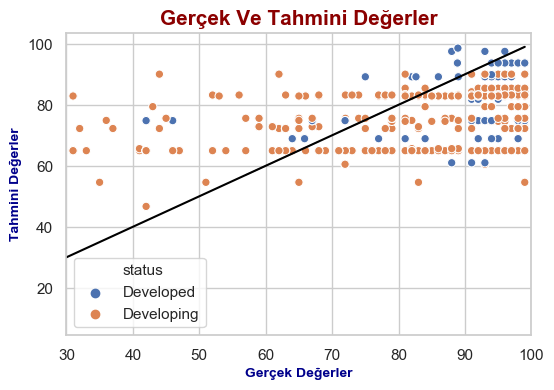

Ortalama Mutlak Hata (MAE): 18.484787141176735
Ortalama Kare Hata (MSE): 621.225574719026
Kök Ortalama Kare Hata (RMSE): 24.924397178648594
Ortalama Mutlak Yüzde Hata (MAPE): 75.15695448026815


In [218]:
X_test= sm.add_constant(X_test)
Y_preds= model_5.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x= Y_test, y=Y_preds, hue=df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.xlim(30,100)
plt.title("Gerçek Ve Tahmini Değerler", fontdict=title_font)
plt.xlabel("Gerçek Değerler", fontdict=label_font)
plt.ylabel("Tahmini Değerler", fontdict=label_font)
plt.show()

print("Ortalama Mutlak Hata (MAE): {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Ortalama Kare Hata (MSE): {}".format(mse(Y_test, Y_preds)))
print("Kök Ortalama Kare Hata (RMSE): {}".format(rmse(Y_test, Y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE): {}".format(np.mean(np.abs((Y_test-Y_preds) / Y_test))*100))

## Dummy, norm ve scale olmadığı tahmin 

In [145]:
df3.columns

Index(['bmı', 'winsorize_life_expectancy', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'norm_bmı', 'norm_winsorize_life_expectancy',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp', 'scale_

In [219]:
df_t= df3.copy()
request_col= ['bmı', 'winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'log_percentage_expenditure',
       'log_alcohol','norm_bmı' ] 
Y= df_t["winsorize_life_expectancy"]
X= df_t[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
model_2= sm.OLS(Y_train, X_train).fit()
model_2.summary()#


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.860
Model:                                   OLS   Adj. R-squared:                  0.860
Method:                        Least Squares   F-statistic:                     2313.
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:31:09   Log-Likelihood:                -8459.2
No. Observations:                       2260   AIC:                         1.693e+04
Df Residuals:                           2253   BIC:                         1.697e+04
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -27.5687      1.425    -19.350      0.000     -30.363     -24.775
bmı                            0.0135      0.014      0.996      0.320      -0.013       0.040
winsorize_schooling            2.0461      0.142     14.446      0.000       1.768       2.324
winsorize_hepatitis_b          1.4493      0.013    109.663      0.000       1.423       1.475
winsorize_gdp                 -0.0002   3.15e-05     -6.525      0.000      -0.000      -0.000
log_percentage_expenditure     0.2860      0.181      1.578      0.115      -0.069       0.641
log_alcohol                   -1.3023      0.288     -4.517      0.000      -1.868      -0.737
norm_bmı                    5.829e-06   5.85e-06      0.996      0.320   -5.65e-06    1.73e-05
==============================================================================
Omnibus:                      184.690   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.228
Skew:                          -0.638   Prob(JB):                     4.43e-40
Kurtosis:                       2.454   Cond. No.                     4.05e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

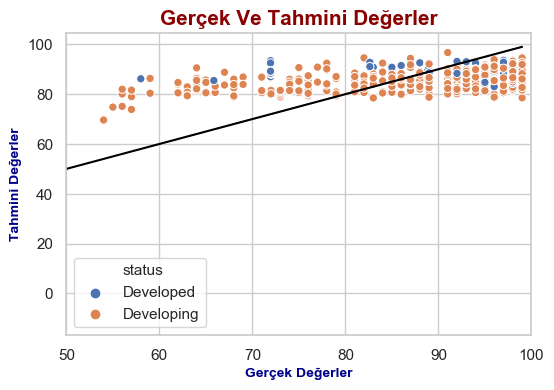

Mean Absolute Error: 8.622612529069984
Mean Square Error: 105.7266641414833
Root Mean Square Error: 10.282347209731993
Mean Absolute Percentage Error: 16.82536489874055


In [220]:
X_test= sm.add_constant(X_test)
Y_preds= model_2.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue=df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.xlim(50,100)
plt.title("Gerçek Ve Tahmini Değerler", fontdict=title_font)
plt.xlabel("Gerçek Değerler", fontdict=label_font)
plt.ylabel("Tahmini Değerler", fontdict=label_font)
plt.show()

print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean Square Error: {}".format(mse(Y_test, Y_preds)))
print("Root Mean Square Error: {}".format(rmse(Y_test, Y_preds)))
print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_preds) / Y_test))*100))


## Standardizasyonlu tahmin

In [225]:
df_t= df3.copy()
request_col= ['bmı', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'scale_log_percentage_expenditure', 'scale_log_alcohol',
       'scale_winsorize_schooling', 'scale_winsorize_hepatitis_b',
       'scale_winsorize_gdp']


In [226]:
Y= df_t["winsorize_life_expectancy"]
X= df_t[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
model_4= sm.OLS(Y_train, X_train).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.883
Model:                                   OLS   Adj. R-squared:                  0.882
Method:                        Least Squares   F-statistic:                     736.3
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:33:18   Log-Likelihood:                -8276.4
No. Observations:                       2260   AIC:                         1.660e+04
Df Residuals:                           2236   BIC:                         1.674e+04
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         47.4918      0.500     95.009      0.000      46.512      48.472
bmı                                            0.0253      0.016      1.595      0.111      -0.006       0.056
sub_region_Australia and New Zealand           0.3553      1.900      0.187      0.852      -3.370       4.081
sub_region_Central Asia                       12.0401      1.240      9.708      0.000       9.608      14.472
sub_region_Eastern Asia                        8.0729      1.433      5.632      0.000       5.262      10.884
sub_region_Eastern Europe                      6.2730      1.022      6.136      0.000       4.268       8.278
sub_region_Latin America and the Caribbean     5.9464      0.632      9.412      0.000       4.708       7.185
sub_region_Melanesia                           1.2283      1.320      0.931      0.352      -1.360       3.817
sub_region_Micronesia                          4.7848      1.750      2.734      0.006       1.353       8.217
sub_region_Northern Africa                    10.3710      1.166      8.897      0.000       8.085      12.657
sub_region_Northern America                   -7.1918      1.979     -3.634      0.000     -11.072      -3.311
sub_region_Northern Europe                   -11.8169      0.999    -11.832      0.000     -13.775      -9.858
sub_region_Polynesia                          -5.4050      1.861     -2.904      0.004      -9.055      -1.755
sub_region_South-eastern Asia                  6.5064      0.912      7.136      0.000       4.718       8.295
sub_region_Southern Asia                       8.2861      1.046      7.920      0.000       6.234      10.338
sub_region_Southern Europe                     2.7065      0.865      3.128      0.002       1.010       4.403
sub_region_Sub-Saharan Africa                  5.0681      0.704      7.202      0.000       3.688       6.448
sub_region_Western Asia                        5.4819      0.722      7.592      0.000       4.066       6.898
sub_region_Western Europe                     -5.2155      1.192     -4.376      0.000      -7.553      -2.878
status_Developed                              24.1662      0.549     44.053      0.000      23.090      25.242
status_Developing                             23.3256      0.448     52.071      0.000      22.447      24.204
scale_log_percentage_expenditure               0.9266      0.344      2.697      0.007       0.253       1.600
scale_log_alcohol                              0.1848      0.303      0.610      0.542      -0.409       0.779
scale_winsorize_schooling                      5.1776      0.361     14.348      0.000       4.470       5.885
scale_win

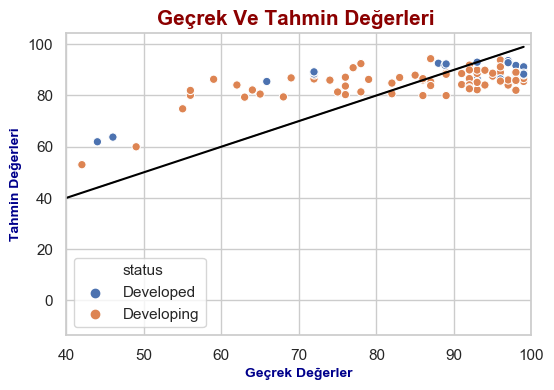

Mean Absolute Error: 25.147673580365332
Mean Square Error: 1343.7993778929306
Root Mean Square Error: 36.65786924922029
Mean Absolute Percentage Error: 16.235294153746423


In [227]:
X_test= sm.add_constant(X_test)
y_preds= model_4.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue= df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.xlim(40,100)
plt.title("Geçrek Ve Tahmin Değerleri ", fontdict=title_font)
plt.xlabel("Geçrek Değerler", fontdict=label_font)
plt.ylabel("Tahmin Değerleri", fontdict=label_font)
plt.show()

print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean Square Error: {}".format(mse(Y_test, Y_preds)))
print("Root Mean Square Error: {}".format(rmse(Y_test, Y_preds)))
print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_preds) / Y_test))*100))


## Log dönüşümü olmayan tahmin:

In [229]:
df_t= df2.copy()
request_col= ['percentage_expenditure', 'alcohol','winsorize_schooling',
       'winsorize_hepatitis_b', 'winsorize_gdp', 'sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing']
Y=df_t["winsorize_life_expectancy"]
X= df_t[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
model_7= sm.OLS(Y_train, X_train).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.882
Model:                                   OLS   Adj. R-squared:                  0.881
Method:                        Least Squares   F-statistic:                     762.8
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:36:42   Log-Likelihood:                -8260.5
No. Observations:                       2260   AIC:                         1.657e+04
Df Residuals:                           2237   BIC:                         1.670e+04
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -19.7499      1.206    -16.372      0.000     -22.115     -17.384
percentage_expenditure                        -0.0008      0.000     -4.788      0.000      -0.001      -0.000
alcohol                                        0.0100      0.082      0.122      0.903      -0.151       0.171
winsorize_schooling                            2.2465      0.145     15.528      0.000       1.963       2.530
winsorize_hepatitis_b                          1.4324      0.012    114.895      0.000       1.408       1.457
winsorize_gdp                                  0.0001   3.73e-05      3.228      0.001    4.72e-05       0.000
sub_region_Australia and New Zealand          -1.0455      2.116     -0.494      0.621      -5.195       3.104
sub_region_Central Asia                        7.4174      1.201      6.174      0.000       5.061       9.773
sub_region_Eastern Asia                        4.8807      1.453      3.358      0.001       2.030       7.731
sub_region_Eastern Europe                      1.1623      1.056      1.101      0.271      -0.908       3.233
sub_region_Latin America and the Caribbean     1.7360      0.607      2.859      0.004       0.545       2.927
sub_region_Melanesia                          -3.3209      1.376     -2.413      0.016      -6.019      -0.622
sub_region_Micronesia                          1.5644      1.632      0.958      0.338      -1.637       4.765
sub_region_Northern Africa                     6.5830      1.105      5.956      0.000       4.416       8.750
sub_region_Northern America                  -10.0460      1.874     -5.360      0.000     -13.722      -6.371
sub_region_Northern Europe                   -15.8731      1.045    -15.189      0.000     -17.922     -13.824
sub_region_Polynesia                          -9.5984      1.746     -5.498      0.000     -13.022      -6.175
sub_region_South-eastern Asia                  1.0870      0.856      1.270      0.204      -0.592       2.766
sub_region_Southern Asia                       3.4812      0.977      3.565      0.000       1.566       5.396
sub_region_Southern Europe                    -1.1017      0.866     -1.273      0.203      -2.799       0.596
sub_region_Sub-Saharan Africa                  0.3245      0.613      0.530      0.596      -0.877       1.526
sub_region_Western Asia                        1.1650      0.748      1.557      0.120      -0.303       2.633
sub_region_Western Europe                     -8.1658      1.251     -6.529      0.000     -10.618      -5.713
status_Developed                              -9.2046      0.818    -11.255      0.000     -10.808      -7.601
status_De

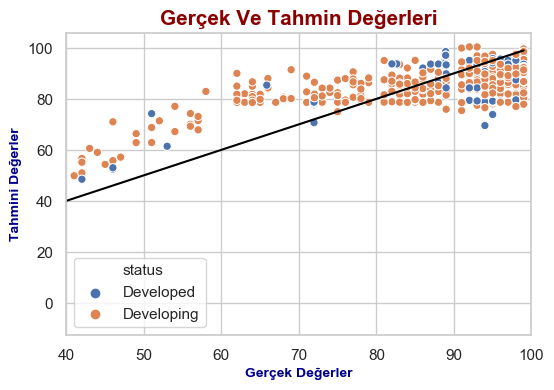

Mean Absolute Error: 7.556799051281965
Mean Square Error: 86.01982707612876
Root Mean Square Error: 9.274687438190506
Mean Absolute Percentage Error: 16.22068602719839


In [230]:
X_test= sm.add_constant(X_test)
Y_preds= model_7.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue=df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.xlim(40,100)
plt.title("Gerçek Ve Tahmin Değerleri",fontdict=title_font)
plt.xlabel("Gerçek Değerler", fontdict=label_font)
plt.ylabel("Tahmini Değerler", fontdict=label_font)
plt.show()

print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean Square Error: {}".format(mse(Y_test, Y_preds)))
print("Root Mean Square Error: {}".format(rmse(Y_test, Y_preds)))
print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_preds)/ Y_test))*100))


## Normalizasyonlu tahmin:

In [231]:
df_t= df3.copy()
request_col= ['sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'norm_bmı',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp']


Y= df_t["winsorize_life_expectancy"]
X= df_t[request_col]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
model_3= sm.OLS(Y_train, X_train).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.886
Model:                                   OLS   Adj. R-squared:                  0.884
Method:                        Least Squares   F-statistic:                     752.6
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:39:08   Log-Likelihood:                -8253.4
No. Observations:                       2260   AIC:                         1.655e+04
Df Residuals:                           2236   BIC:                         1.669e+04
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -20.8255      1.208    -17.246      0.000     -23.194     -18.457
sub_region_Australia and New Zealand          -4.1293      2.218     -1.862      0.063      -8.478       0.220
sub_region_Central Asia                        8.5565      1.215      7.044      0.000       6.174      10.939
sub_region_Eastern Asia                        4.7084      1.506      3.127      0.002       1.756       7.661
sub_region_Eastern Europe                      0.9024      1.036      0.871      0.384      -1.129       2.934
sub_region_Latin America and the Caribbean     1.4868      0.631      2.356      0.019       0.249       2.724
sub_region_Melanesia                          -1.8448      1.328     -1.389      0.165      -4.449       0.759
sub_region_Micronesia                          0.7747      1.864      0.416      0.678      -2.880       4.429
sub_region_Northern Africa                     6.0593      1.113      5.445      0.000       3.877       8.242
sub_region_Northern America                   -9.3362      2.050     -4.554      0.000     -13.357      -5.316
sub_region_Northern Europe                   -15.9891      1.040    -15.374      0.000     -18.029     -13.950
sub_region_Polynesia                          -8.2127      1.758     -4.671      0.000     -11.660      -4.765
sub_region_South-eastern Asia                  2.0017      0.900      2.224      0.026       0.236       3.767
sub_region_Southern Asia                       3.3500      1.002      3.344      0.001       1.385       5.315
sub_region_Southern Europe                    -1.2587      0.891     -1.412      0.158      -3.006       0.489
sub_region_Sub-Saharan Africa                  0.2083      0.672      0.310      0.757      -1.110       1.526
sub_region_Western Asia                        1.3616      0.731      1.864      0.062      -0.071       2.794
sub_region_Western Europe                     -9.4646      1.214     -7.794      0.000     -11.846      -7.083
status_Developed                              -9.8403      0.819    -12.016      0.000     -11.446      -8.234
status_Developing                            -10.9851      0.661    -16.621      0.000     -12.281      -9.689
norm_bmı                                      30.0184     35.856      0.837      0.403     -40.297     100.333
norm_log_percentage_expenditure              110.5016     49.580      2.229      0.026      13.274     207.729
norm_log_alcohol                               9.8087     29.011      0.338      0.735     -47.082      66.699
norm_winsorize_schooling                    1486.7417     98.189     15.142      0.000    1294.191    1679.292
norm_wins

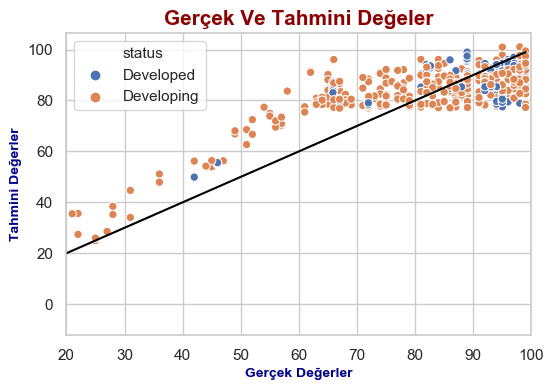

Mean Absolute Error: 7.710710030001956
Mean Square Error: 89.44487830705357
Root Mean Square Error: 9.457530243517786
Mean Absolute Percentage Error: 15.446610364720058


In [232]:
X_test= sm.add_constant(X_test)
Y_preds= model_3.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue=df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.xlim(20,100)
plt.title("Gerçek Ve Tahmini Değeler", fontdict=title_font)
plt.xlabel("Gerçek Değerler", fontdict=label_font)
plt.ylabel("Tahmini Değerler", fontdict=label_font)
plt.show()

print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean Square Error: {}".format(mse(Y_test, Y_preds)))
print("Root Mean Square Error: {}".format(rmse(Y_test, Y_preds)))
print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test- Y_preds) / Y_test))*100))

## Sağlıkla ilgili kolonların tahmini:

In [234]:
df_t= df3.copy()
request_col= ['winsorize_hepatitis_b',
              'log_percentage_expenditure', 'log_alcohol', 'bmı']
Y= df_t["winsorize_life_expectancy"]
X= df_t[request_col]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
model_6= sm.OLS(Y_train, X_train).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     winsorize_life_expectancy   R-squared:                       0.845
Model:                                   OLS   Adj. R-squared:                  0.845
Method:                        Least Squares   F-statistic:                     3083.
Date:                       Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                               01:44:04   Log-Likelihood:                -8552.2
No. Observations:                       2260   AIC:                         1.711e+04
Df Residuals:                           2255   BIC:                         1.714e+04
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -11.9022      0.952    -12.499      0.000     -13.770     -10.035
winsorize_hepatitis_b          1.4926      0.014    107.885      0.000       1.465       1.520
log_percentage_expenditure     0.4976      0.135      3.696      0.000       0.234       0.762
log_alcohol                    0.0738      0.283      0.261      0.794      -0.480       0.628
bmı                            0.0889      0.013      7.029      0.000       0.064       0.114
==============================================================================
Omnibus:                      244.292   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.399
Skew:                          -0.684   Prob(JB):                     6.20e-48
Kurtosis:                       2.338   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

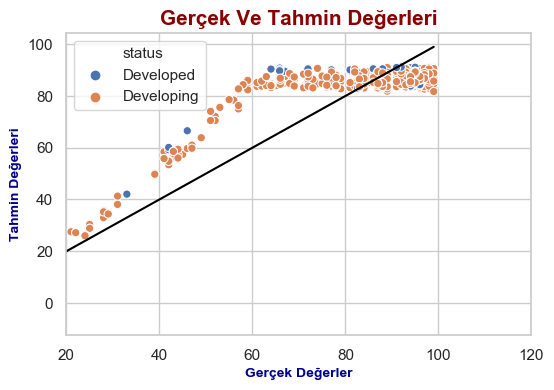

Mean Absolute Error: 9.10491423350792
Mean Square Error: 118.29748430669115
Root Mean Square Error: 10.87646469707373
Mean Absolute Percentage Error: 18.55495606129834


In [237]:
X_test= sm.add_constant(X_test)
Y_preds= model_6.predict(X_test)

plt.figure(dpi=100)
sns.scatterplot(x=Y_test, y=Y_preds, hue=df["status"])
sns.lineplot(x=Y_test, y=Y_test, color="black")
plt.title("Gerçek Ve Tahmin Değerleri", fontdict=title_font)
plt.xlim(20,120)
plt.xlabel("Gerçek Değerler", fontdict=label_font)
plt.ylabel("Tahmin Değerleri", fontdict=label_font)
plt.show()

print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Mean Square Error: {}".format(mse(Y_test, Y_preds)))
print("Root Mean Square Error: {}".format(rmse(Y_test, Y_preds)))
print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_preds)/ Y_test))*100))




# Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

## Aşırı uyumluluk ve regularizasyon

### Ridge Fonksiyonu

In [263]:
from sklearn.linear_model import Ridge #R kare değeri en yüksek olan model 3. model.(normalize değerlerin olduğu model)

In [265]:
request_col= ['sub_region_Australia and New Zealand',
       'sub_region_Central Asia', 'sub_region_Eastern Asia',
       'sub_region_Eastern Europe',
       'sub_region_Latin America and the Caribbean', 'sub_region_Melanesia',
       'sub_region_Micronesia', 'sub_region_Northern Africa',
       'sub_region_Northern America', 'sub_region_Northern Europe',
       'sub_region_Polynesia', 'sub_region_South-eastern Asia',
       'sub_region_Southern Asia', 'sub_region_Southern Europe',
       'sub_region_Sub-Saharan Africa', 'sub_region_Western Asia',
       'sub_region_Western Europe', 'status_Developed', 'status_Developing',
       'norm_bmı', 'norm_winsorize_life_expectancy',
       'norm_log_percentage_expenditure', 'norm_log_alcohol',
       'norm_winsorize_schooling', 'norm_winsorize_hepatitis_b',
       'norm_winsorize_gdp']


In [284]:
Y= df3["winsorize_life_expectancy"]
X= df3[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

for i in range(1,10):
    ridgereg= Ridge(alpha=10**i)
    ridgereg.fit(X_train, Y_train)

    Y_test_tahmini= ridgereg.predict(X_test)
    
    print("************")
    print("Alpha değeri 10 üzeri {} için: ".format(i))
    print("Eğitim kümesi gözlem sayısı: {}".format(Y_train.shape[0]))
    print("Test kümesi gözlem sayısı: {}".format(Y_test.shape[0]))
    print("Eğitim kümesindeki R-kare değeri: {}".format(ridgereg.score(X_train, Y_train)))
    print("-------Test kümesi istatistikleri---------")
    print("Test kümesindeki R-kare değeri: {}".format(ridgereg.score(X_test, Y_test)))
    print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_test_tahmini)))
    print("Mean Square Error: {}".format(mse(Y_test, Y_test_tahmini)))
    print("Root Mean Square Error: {}".format(rmse(Y_test, Y_test_tahmini)))
    print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_test_tahmini)/ Y_test))*100))

************
Alpha değeri 10 üzeri 1 için: 
Eğitim kümesi gözlem sayısı: 2260
Test kümesi gözlem sayısı: 566
Eğitim kümesindeki R-kare değeri: 0.1476584948096672
-------Test kümesi istatistikleri---------
Test kümesindeki R-kare değeri: 0.14417327293019566
Mean Absolute Error: 17.62467922884329
Mean Square Error: 555.077425416704
Root Mean Square Error: 23.56008118442515
Mean Absolute Percentage Error: 69.60826551716124
************
Alpha değeri 10 üzeri 2 için: 
Eğitim kümesi gözlem sayısı: 2260
Test kümesi gözlem sayısı: 566
Eğitim kümesindeki R-kare değeri: 0.10082009637081257
-------Test kümesi istatistikleri---------
Test kümesindeki R-kare değeri: 0.106830191223106
Mean Absolute Error: 18.188048702037587
Mean Square Error: 579.2976337783509
Root Mean Square Error: 24.06860265529245
Mean Absolute Percentage Error: 71.7993071641154
************
Alpha değeri 10 üzeri 3 için: 
Eğitim kümesi gözlem sayısı: 2260
Test kümesi gözlem sayısı: 566
Eğitim kümesindeki R-kare değeri: 0.0446652

#### koşullu seçim:

In [283]:
Y= df3["winsorize_life_expectancy"]
X= df3[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

for i in range(1,40):
    ridgereg= Ridge(alpha=10**i)
    ridgereg.fit(X_train, Y_train)
    
    Y_test_tahmini= ridgereg.predict(X_test)
    if ridgereg.score(X_train, Y_train)<1.0:
         print("Eğitim kümesi R kare değerleri: {}".format(ridgereg.score(X_train, Y_train)))
    elif ridgereg.score(X_train, Y_train)>0.5:
                 print("Eğitim kümesi R kare değerleri: {}".format(ridgereg.score(X_train, Y_train)))


Eğitim kümesi R kare değerleri: 0.15270862455099465
Eğitim kümesi R kare değerleri: 0.10823541477448219
Eğitim kümesi R kare değerleri: 0.04955798672977296
Eğitim kümesi R kare değerleri: 0.008355459622471084
Eğitim kümesi R kare değerleri: 0.0008983775567504848
Eğitim kümesi R kare değerleri: 9.051994315456557e-05
Eğitim kümesi R kare değerleri: 9.058874762657432e-06
Eğitim kümesi R kare değerleri: 9.059563398361449e-07
Eğitim kümesi R kare değerleri: 9.059632255503658e-08
Eğitim kümesi R kare değerleri: 9.059639038966338e-09
Eğitim kümesi R kare değerleri: 9.059639705100153e-10
Eğitim kümesi R kare değerleri: 9.059630823315956e-11
Eğitim kümesi R kare değerleri: 9.05953090324374e-12
Eğitim kümesi R kare değerleri: 9.058309657916652e-13
Eğitim kümesi R kare değerleri: 9.048317650695026e-14
Eğitim kümesi R kare değerleri: 8.992806499463768e-15
Eğitim kümesi R kare değerleri: 7.771561172376096e-16
Eğitim kümesi R kare değerleri: 0.0
Eğitim kümesi R kare değerleri: 0.0
Eğitim kümesi R ka

In [266]:
Y= df3["winsorize_life_expectancy"]
X= df3[request_col]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


ridgereg= Ridge(alpha=10*37)
ridgereg.fit(X_train, Y_train)

Y_test_tahmini= ridgereg.predict(X_test)

print("Eğitim kümesi gözlem sayısı: {}".format(Y_train.shape[0]))
print("Test kümesi gözlem sayısı: {}".format(Y_test.shape[0]))

print("Eğitim kümesindeki R-kare değeri: {}".format(ridgereg.score(X_train, Y_train)))
print("-------Test kümesi istatistikleri---------")
print("Test kümesindeki R-kare değeri: {}".format(ridgereg.score(X_test, Y_test)))
print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_test_tahmini)))
print("Mean Square Error: {}".format(mse(Y_test, Y_test_tahmini)))
print("Root Mean Square Error: {}".format(rmse(Y_test, Y_test_tahmini)))
print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_test_tahmini)/ Y_test))*100))

Eğitim kümesi gözlem sayısı: 2260
Test kümesi gözlem sayısı: 566
Eğitim kümesindeki R-kare değeri: 0.0680409899531681
-------Test kümesi istatistikleri---------
Test kümesindeki R-kare değeri: 0.07773408487785816
Mean Absolute Error: 19.948283183252347
Mean Square Error: 672.0366196638124
Root Mean Square Error: 25.923669101109365
Mean Absolute Percentage Error: 82.61595442415415


### Lasso Regresyonu

In [238]:
from sklearn.linear_model import Lasso

In [254]:
for i in range(1,30):
    print("******************")
    print("Alpha değeri {} için:".format(i))
    lassoreg= Lasso(alpha=10**i)
    lassoreg.fit(X_train, Y_train)

    Y_test_tahmini= lassoreg.predict(X_test)
    
    print("Eğitim kümesi R-kare değeri: {}".format(lassoreg.score(X_train, Y_train)))
    print("----Test Kümesi Hakkında İstatistikler-------")
    print("Test kümesi R-kare değeri: {}".format(lassoreg.score(X_test, Y_test)))
    print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_test_tahmini)))
    print("Mean Square Error: {}".format(mse(Y_test, Y_test_tahmini)))
    print("Root Mean Square Error: {}".format(rmse(Y_test, Y_test_tahmini)))
    print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_test_tahmini)/ Y_test))*100))
    # bu yöntem uygun mu?

******************
Alpha değeri 1 için:
Eğitim kümesi R-kare değeri: 0.8435369220921098
----Test Kümesi Hakkında İstatistikler-------
Test kümesi R-kare değeri: 0.8515645926240245
Mean Absolute Error: 9.169321307747758
Mean Square Error: 118.07786807641801
Root Mean Square Error: 10.866364068832684
Mean Absolute Percentage Error: 17.40482321016036
******************
Alpha değeri 2 için:
Eğitim kümesi R-kare değeri: 0.7868298079929921
----Test Kümesi Hakkında İstatistikler-------
Test kümesi R-kare değeri: 0.8012982785616833
Mean Absolute Error: 11.340280454773119
Mean Square Error: 158.0638748214741
Root Mean Square Error: 12.57234563721003
Mean Absolute Percentage Error: 28.02694324307834
******************
Alpha değeri 3 için:
Eğitim kümesi R-kare değeri: 0.0
----Test Kümesi Hakkında İstatistikler-------
Test kümesi R-kare değeri: -0.0046618464378824775
Mean Absolute Error: 21.795789076904903
Mean Square Error: 799.1915881944954
Root Mean Square Error: 28.269976798619687
Mean Absolut

### ElasticNet regresyonu

In [240]:
from sklearn.linear_model import ElasticNet

In [286]:
for i in range(1,30):
    elasticreg= ElasticNet(alpha=10**i, l1_ratio=0.5)
    elasticreg.fit(X_train, Y_train)

    Y_test_tahmini= elasticreg.predict(X_test)
    print("*********************")
    print("Alpha değeri 10 üzeri {} için: ".format(i))
    print("Eğitim kümesi R-kare değeri: {}".format(elasticreg.score(X_train, Y_train)))
    print("----Test Kümesi Hakkında İstatistikler-------")
    print("Test kümesi R-kare değeri: {}".format(elasticreg.score(X_test, Y_test)))
    print("Mean Absolute Error: {}".format(mean_absolute_error(Y_test, Y_test_tahmini)))
    print("Mean Square Error: {}".format(mse(Y_test, Y_test_tahmini)))
    print("Root Mean Square Error: {}".format(rmse(Y_test, Y_test_tahmini)))
    print("Mean Absolute Percentage Error: {}".format(np.mean(np.abs((Y_test-Y_test_tahmini)/ Y_test))*100))

*********************
Alpha değeri 10 üzeri 1 için: 
Eğitim kümesi R-kare değeri: 0.0
----Test Kümesi Hakkında İstatistikler-------
Test kümesi R-kare değeri: -0.0014649526721335346
Mean Absolute Error: 19.72664808350073
Mean Square Error: 649.5363722485952
Root Mean Square Error: 25.486003457752947
Mean Absolute Percentage Error: 76.00060768799908
*********************
Alpha değeri 10 üzeri 2 için: 
Eğitim kümesi R-kare değeri: 0.0
----Test Kümesi Hakkında İstatistikler-------
Test kümesi R-kare değeri: -0.0014649526721335346
Mean Absolute Error: 19.72664808350073
Mean Square Error: 649.5363722485952
Root Mean Square Error: 25.486003457752947
Mean Absolute Percentage Error: 76.00060768799908
*********************
Alpha değeri 10 üzeri 3 için: 
Eğitim kümesi R-kare değeri: 0.0
----Test Kümesi Hakkında İstatistikler-------
Test kümesi R-kare değeri: -0.0014649526721335346
Mean Absolute Error: 19.72664808350073
Mean Square Error: 649.5363722485952
Root Mean Square Error: 25.4860034577529

In [271]:
comparation= pd.DataFrame({"": ["R-Kare (Train)", "R-Kare (Test)", "Mean Absolute Error", "Mean Square Error", "Root Mean Square Error",
                                "Mean Absolute Percentage Error"],
                                 "OLS": [1,2,3,4,5,6],
                                 "RIDGE": [1,2,3,4,5,6],
                                 "ElesticNet": [1,2,3,4,5,6]
                                })
display(comparation)

,,OLS,RIDGE,ElesticNet
0,R-Kare (Train),1,1,1
1,R-Kare (Test),2,2,2
2,Mean Absolute Error,3,3,3
3,Mean Square Error,4,4,4
4,Root Mean Square Error,5,5,5
5,Mean Absolute Percentage Error,6,6,6
